# **Combine Data Cleaning, Feature Selection, Modeling and Interpretability into one report**
### **Assignment 4**

##### **By Sri Poojitha Mandali**

##### Combine Data Cleaning, Feature Selection, Modeling, and Interpretability into one report (Every assignment except TMINST) and make it a cohesive readable report.

 

The focus is readability and clarity.

 

The following must be answered:

1. What is the question?

2. What did you do?

3. How well did it work?

4. What did you learn?

 

#### **Abstract**
Customer churn has become a major problem in banking industry and banks have always tried to track customer interaction with the company to detect early warning signs in customer’s behavior. Below is the customer data of account holders at ABC Multinational Bank and the aim of the Notebook is to check the quality of the data and determine which features are important.

#### **Variable Description**
* `customer_id` - Account Number of customer

* `credit_score` - credit score of the customer

* `country` - country of residence

* `gender` - sex of the customer

* `age` - age of the customer

* `tenure` - from how many years he/she is having bank acc in ABC Bank

* `balance` - Account Balance in customer account

* `products_number` - Number of product from bank

* `credit_card` - if the customer has credit card? 0 -if no and 1 - if yes

* `active_member` - if he/she is active member of bank ?

* `estimated_salary` - salary of account holder

* `churn` - churn status

#### **Datasets**
* The dataset consists of 11 attributes of the customer which are independent variables like customer_id, credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary.
* Churn status attribute is the dependent variable where 1 if the client has left the bank during some period or 0 if he/she has not.
* There a total of 10000 observations in the dataset to track customer behaviour.

In [386]:
#installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [387]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import statsmodels.api as sm  #importing statsmodel for OLS regression
from statsmodels.graphics.gofplots import qqplot
import missingno as msno

from sklearn import model_selection
from sklearn.model_selection import  train_test_split #for splitting data into train, test and validation data
from sklearn.linear_model import LinearRegression ,LogisticRegression # for fitting to get permutation
from sklearn.ensemble import RandomForestClassifier #for modeling with RandomForest model
from sklearn import datasets, linear_model
import eli5
from eli5.sklearn import PermutationImportance
 #Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score,recall_score,f1_score
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import * 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [388]:
#Reading the bank churn dataset
df = pd.read_csv("https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ",sep=',')

In [389]:
# saving a copy of original dataset

df_copy = df.copy()

In [390]:
#Viewing sample of bank churn dataset
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

## **Exploratory Data Analysis**

In [391]:
# Shape of the dataframe 
df.shape

(10000, 12)

The dataset has 10,000 rows and 12 columns

In [392]:
100*df.churn.value_counts(normalize=True)

0    79.63
1    20.37
Name: churn, dtype: float64

Churn data has two classes where 79.63% as 0's and 20.37% as 1's

#### **Q. Check the type data the dataset has ?**

##### **Check Data types of features in dataset**

In [393]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [394]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64


#### **Datatypes:**
* `Customer ID` - has integer values to identify a particular customer.
* `Credit Score` - has integer value to determine the creditworthiness of a customer.
* `Country` - The country where customer lives is of 'object' datatype.
* `Gender` - The Sex of customer is of 'object' datatype.
* `Age` - the age of customer is of 'integer' data type.
* `Tenure` - the Number of years the customer has Bank Account in that Bank is of integer datatype.
* `Balance` - Amount of money present in customer's bank is recorded in 'float' datatype.
* `Products Number` - has integer values for number of Products from that Bank.
* `Credit Card` - is a categorical value , yet represented in Integer to check if the customer own a credit card of that Bank.
* `Active Member` - is a categorical value , yet represented in Integer to check whether the customer is an active member of that Bank.
* `Estimated Salary` - Total Income of the Customer is represented as float.
* `Churn` - Churn (Loss of existing customers) of the Bank is a categorical value , yet represented in Integer.

Dataset has **10000** entries and **12** feature with 7 nominal and 5 categorical features with 20.37% Churn Failure observations or customer leaving observations.

**Numerical features** : customer_id, credit_score, tenure, age, balance, product_number, estimated salary

**Categorical features**: country , gender , credit_card , active_number , churn

#### **Q. Check if the data has missing values ?**

#### **Missing Value Check**



In [395]:
#checking if the any data is missing
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<Axes: >

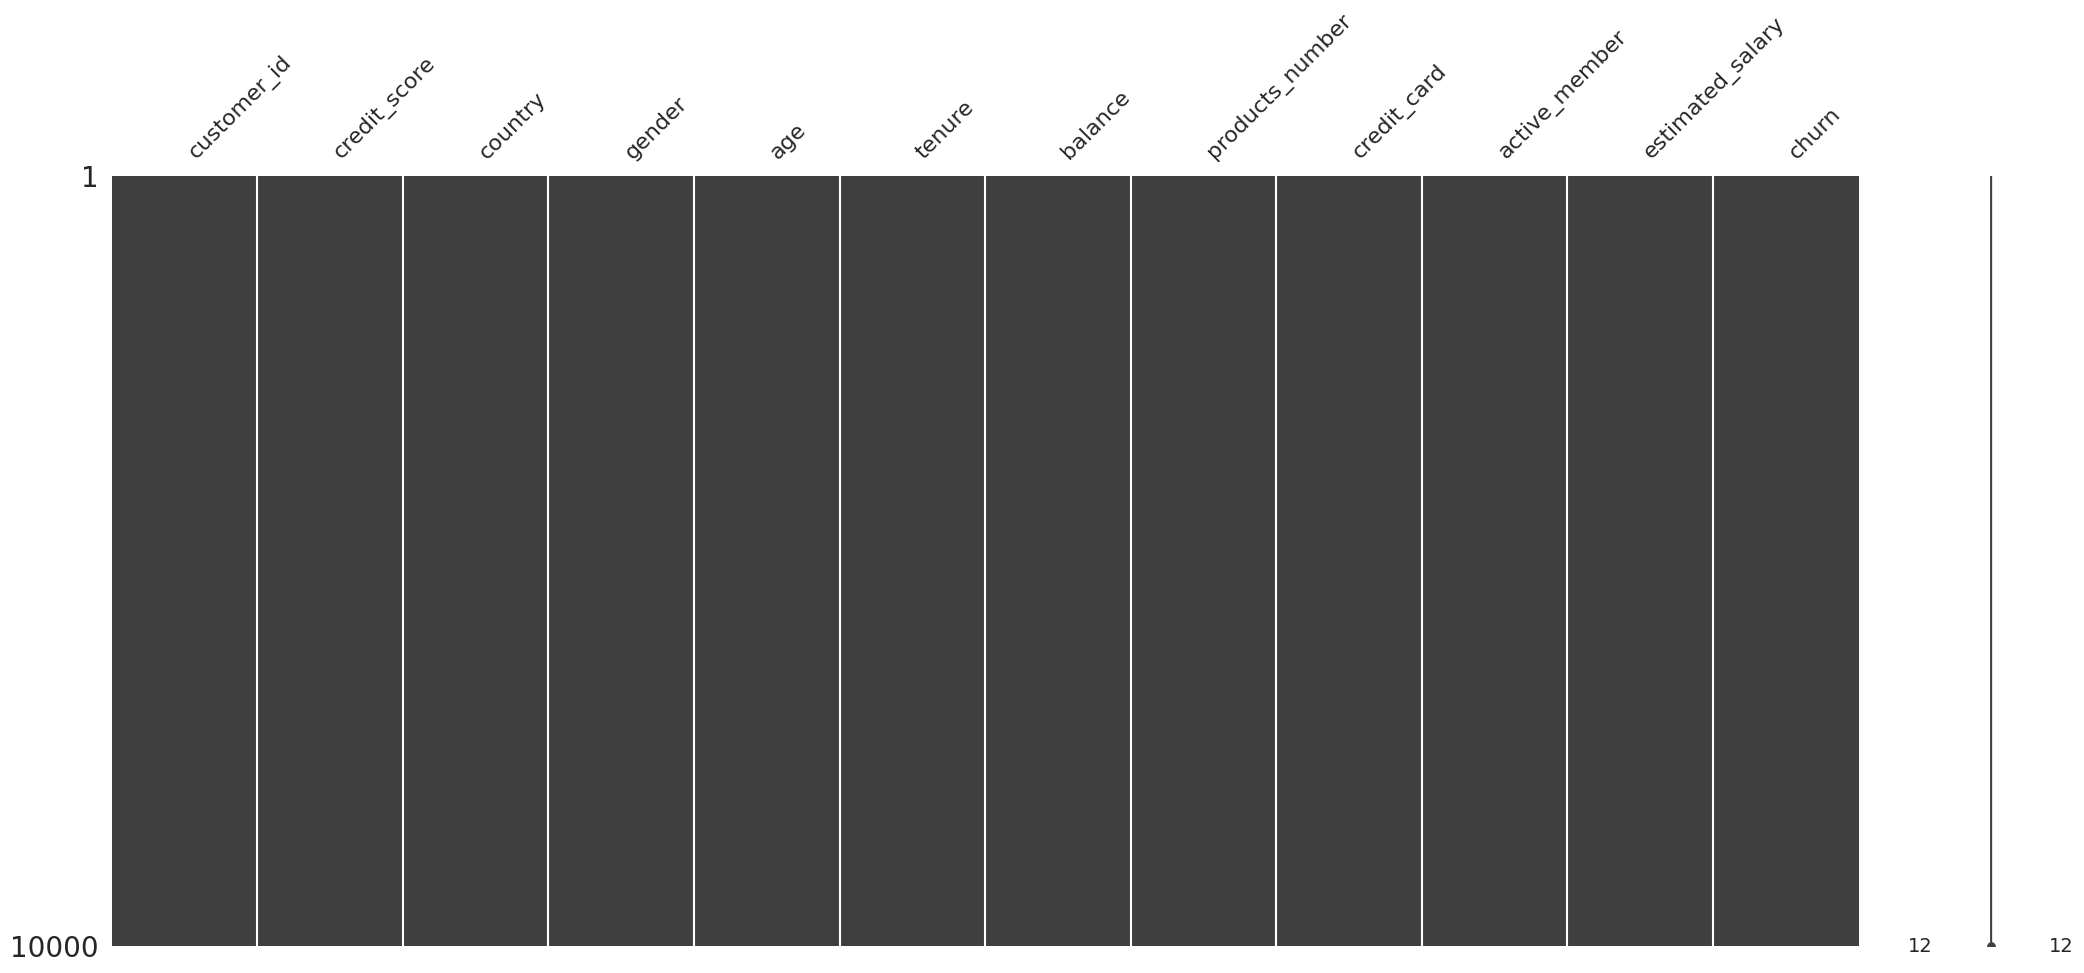

In [396]:
msno.matrix(df)

#### **Which independent variables have missing data ?**

There are no missing values in the data

#### **Dropping feature**  
There is one feature which is can be dropped to improve the accuracy of our predictions. The feature is :

`Customer ID` - Customer ID is randomly allocated to a customer and does not depend on anything.


In [397]:
df = df.drop(["customer_id"],axis = 1)


In [398]:
df.head()

credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

Dropping **customer_id** column as it is just a unique identifiers or number assigned to each customer.


In [399]:
# This gives information about dataset like column data types, column labels, number of columns, 
# number of cell in each column which are not null, range index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### **Univariate analysis**

In [400]:
# provides some statistical information of data in dataframe
df.describe()

credit_score           age        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

#### **Observations so far:**
* `credit_score` has a mean of 650 and 75% of data is distributed between 652 and 850, seems like a good distribution and may not have outliers.
* `age` has a mean of 38.9 years and maximum data is distributed between 37 years to 45 years, but the maximum value is 92 years which might be slightly right skewed from mean and it looks like investigation is needed to understand outliers and it will be discussed further in this notebook.
* `tenure` has a mean 5 and median is 5 and seems like a normal distribution may not have outliers.
* `balance` has mean 76485.889288 , maximum value is 250898.090000, minimum value is 0 and which is slightly left skewed from mean.
* `estimated_balance` has mean 100090.239881 and a median(2nd quantile) of 100193.915000 which is almost a normal distribution.

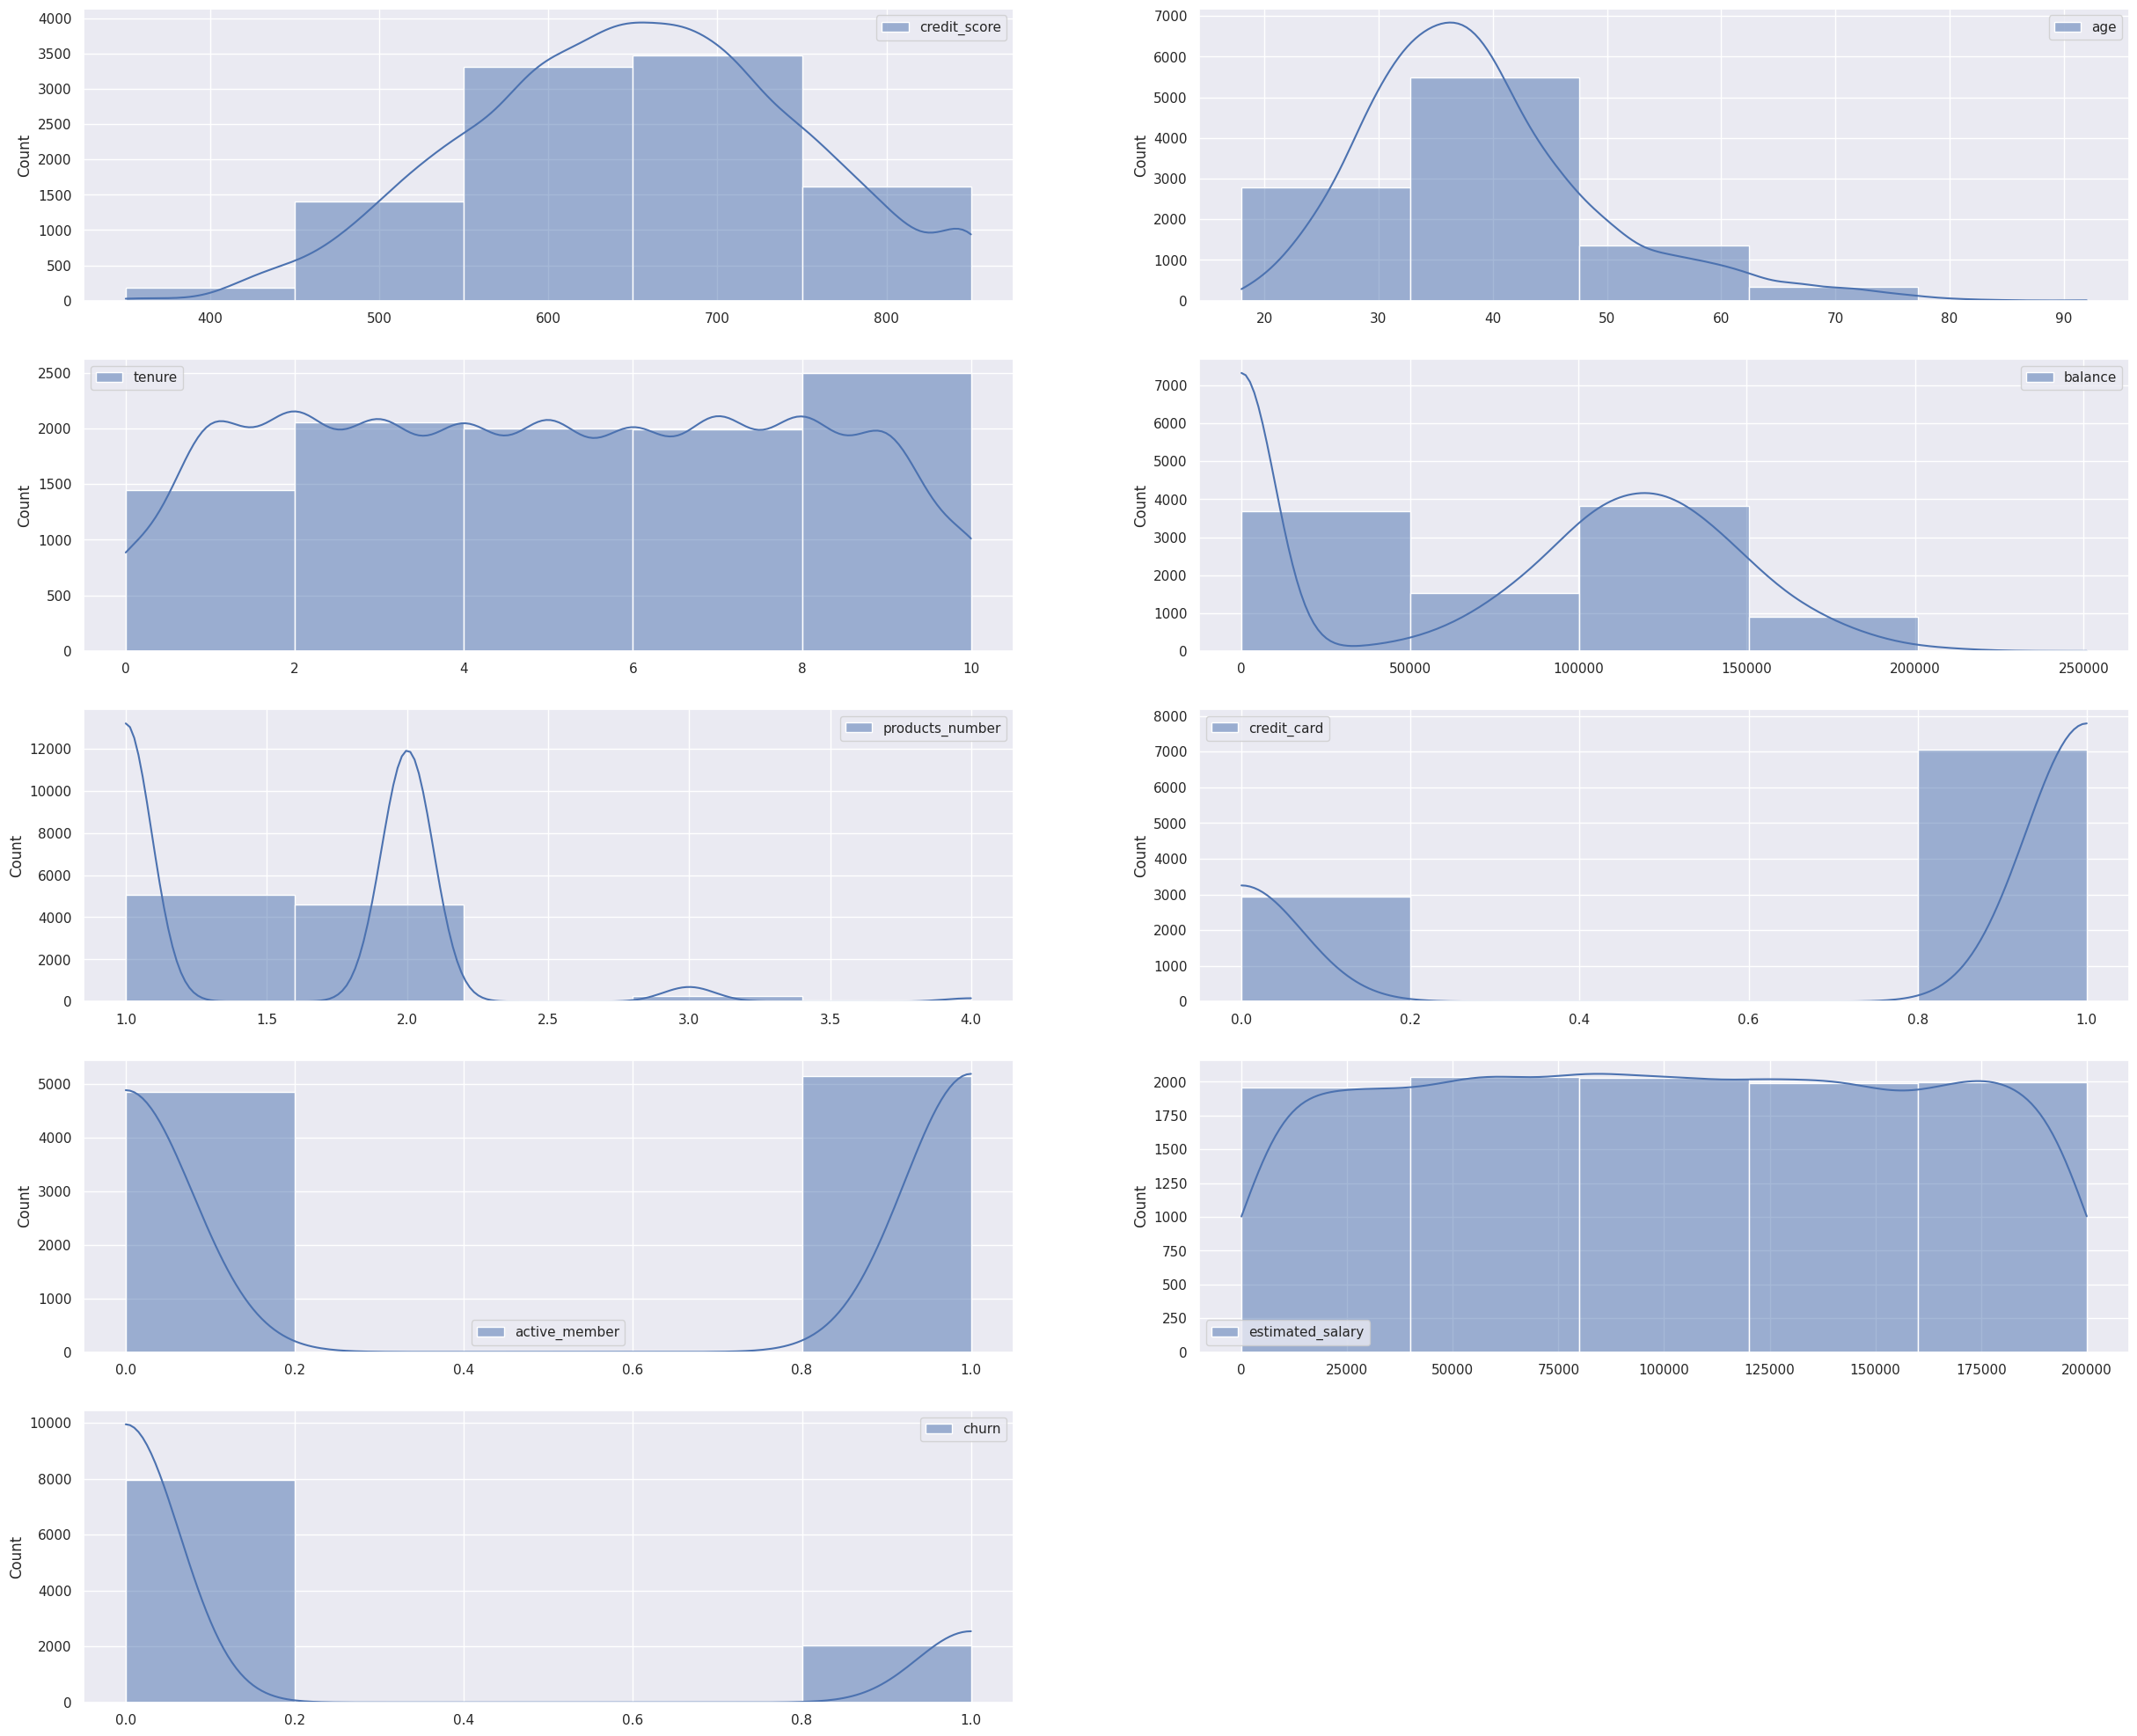

In [401]:
# Histogram plots for continuous features.
numerical_ft = [["credit_score"],["age"],["tenure"],["balance"],["products_number"],["credit_card"],["active_member"],["estimated_salary"],["churn"]]
plt.figure(figsize=(30,25))
for i,col in enumerate(numerical_ft,1):
    plt.subplot(5,2,i)
    sns.histplot(df[col],kde=True,bins = 5)


#### **Q. What are the likely distributions of the numeric variables?**


- `credit_score` looks like a normal distribution , from description mean and median are aligned and 75% of data is close to max value i.e 850.
- `age` has mean 38.92 , median 37 -> slightly right skewed probably due to greater max value , the outlier shifted the mean towards right.This shows that there are potential outliers in this normal distribution. let's understands them better moving forward.
- `balance` is slightly left skewed with max value being around 250898 but 75% of data is close to 127644 thereby projecting that it won't be a normal distribution.
- `estimated_salary` closely follows normal distribution.


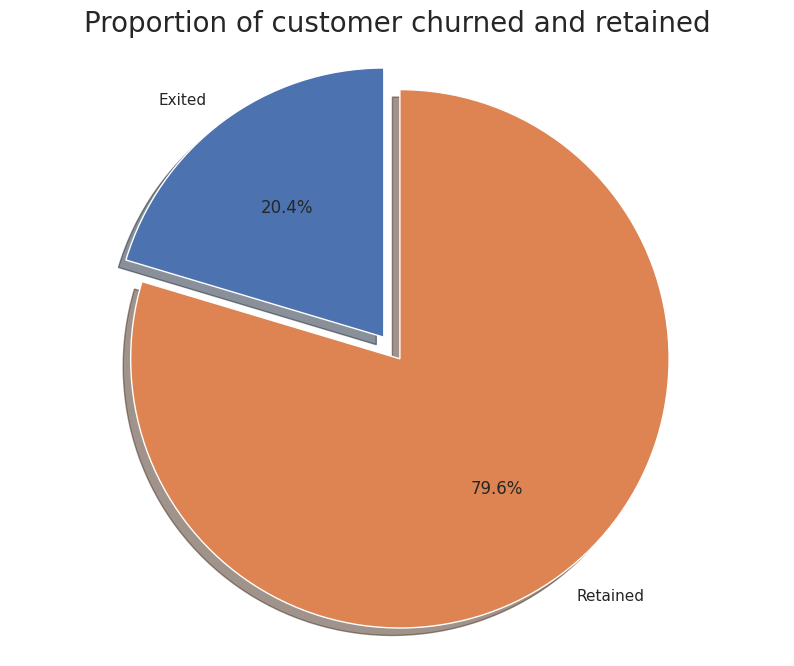

In [402]:
labels = 'Exited', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

20.4% of dataset has details of excited customers and 79.6% are still active.

<Axes: xlabel='active_member', ylabel='count'>

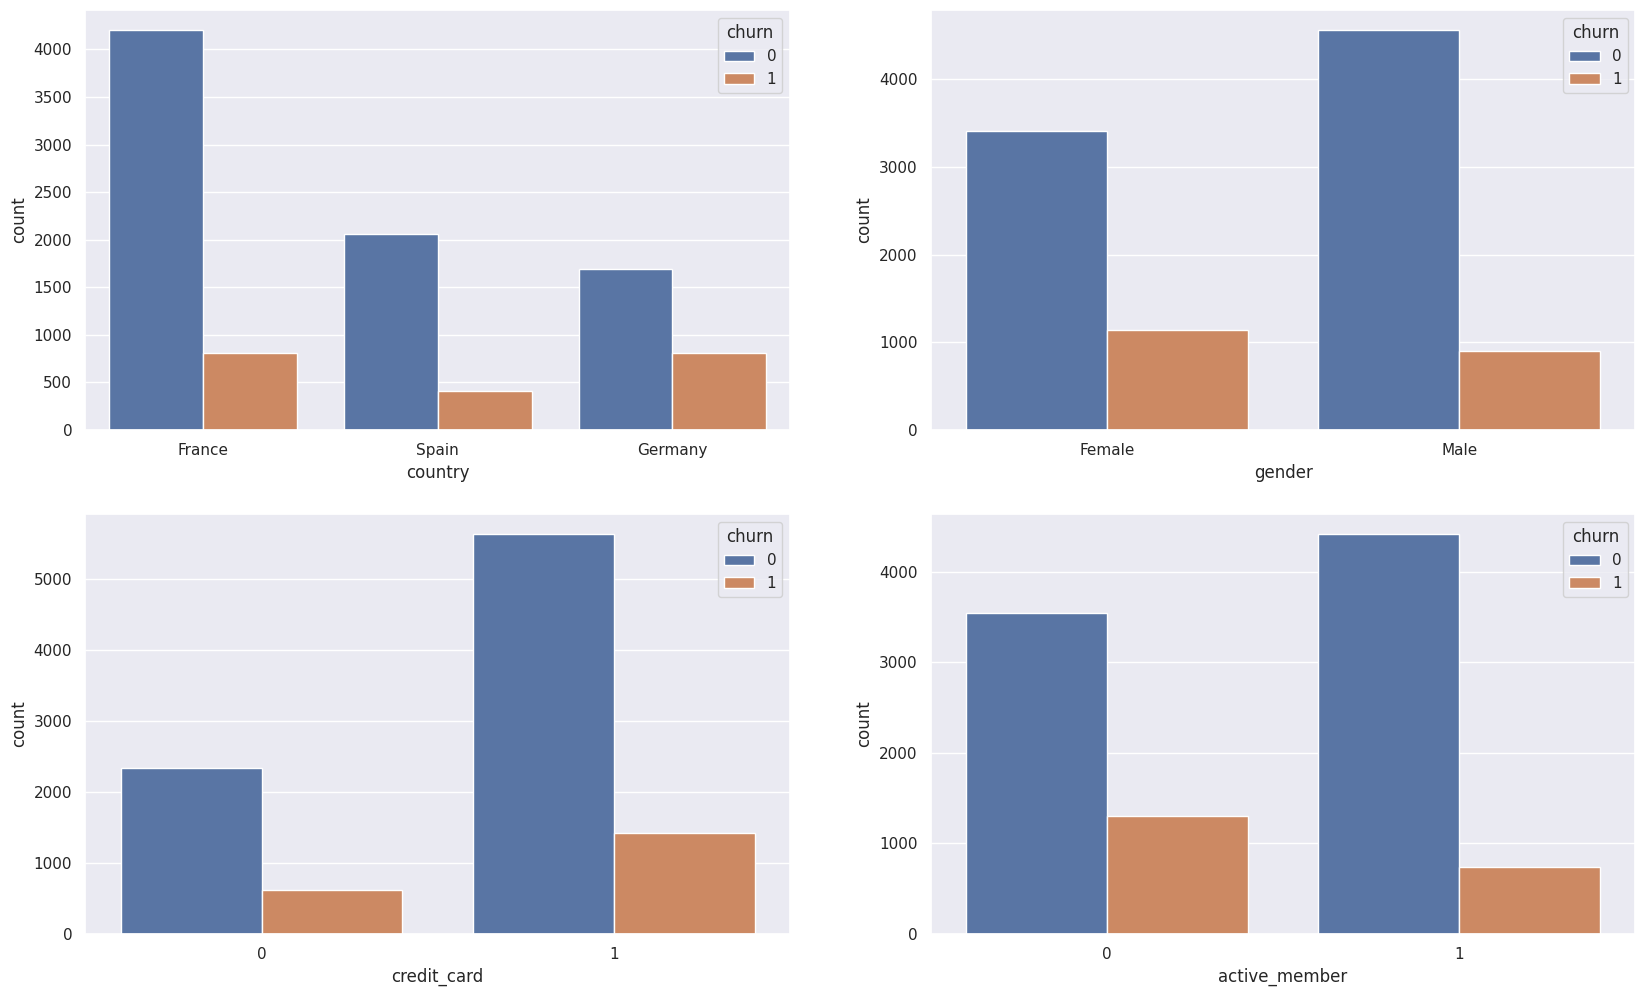

In [403]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='country', hue = 'churn',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'churn',data = df, ax=axarr[0][1])
sns.countplot(x='credit_card', hue = 'churn',data = df, ax=axarr[1][0])
sns.countplot(x='active_member', hue = 'churn',data = df, ax=axarr[1][1])

#### **Observations so far :**

* Considering the `country` , it is observed that the majority of the data comes from **French** citizens. However, the proportion of churned customers is **inversely** related to the population of consumers, implying that the bank may be experiencing a problem (maybe a lack of customer service staff) in locations where it has fewer clients.
* The proportion of female clients who churn is also **higher** than the proportion of male customers when checking churn significance with respect to `gender`.
* Surprisingly, the majority of clients that churned used `credit_card`. Given that the majority of consumers having credit cards, this could be a coincidence.
* Predictably, inactive members have more churn. Alarmingly, the overall proportion of inactive members is **fairly high**, implying that the bank may need to create a campaign to convert this group to `active_member`, as this will undoubtedly have a good impact on customer churn.

<Axes: xlabel='churn', ylabel='estimated_salary'>

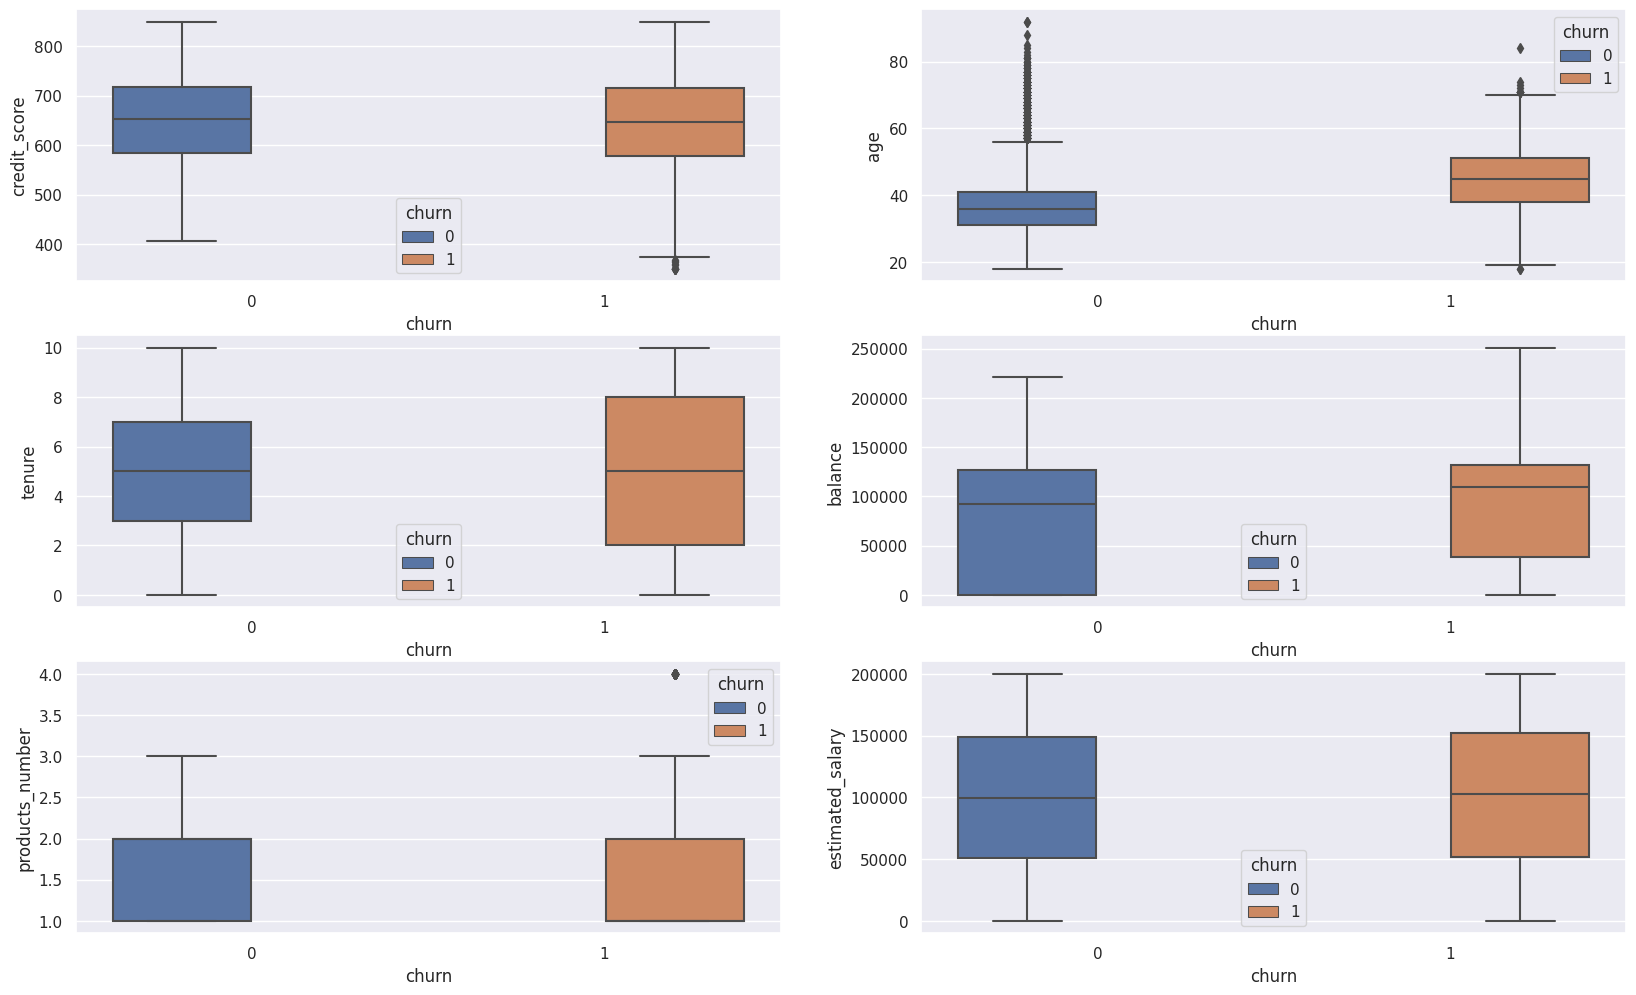

In [404]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='credit_score',x = 'churn', hue = 'churn',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = df, ax=axarr[1][1])
sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = df, ax=axarr[2][0])
sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = df, ax=axarr[2][1])

#### **Observations so far :**

* There is no statistically significant variation in the distribution of `credit_score` between retained and churned consumers. 
* The older clients churn at a higher rate than the younger ones, indicating a variation in service preferences between the age groups. The bank may need to reconsider its target market or its retention strategy for different `age ` groups.
* In terms of `tenure`, clients on either end of the spectrum (spent little or a lot of time with the bank) are more likely to churn than those with an average tenure. 
* Concerningly, the bank is losing customers with accounts having large `balance`, which will reduce its available capital for lending.
* However, neither the `product_number` nor the `estimated_salary` have a substantial impact on churn.


#### **Q. Are there any outliers existing in the data?**

Yes, the boxplot shows that there are visible outliers in `age`,`credit_score` and should be imputed moving forward. This should be done before scaling to avoid skewness in data distribution.

<Axes: >

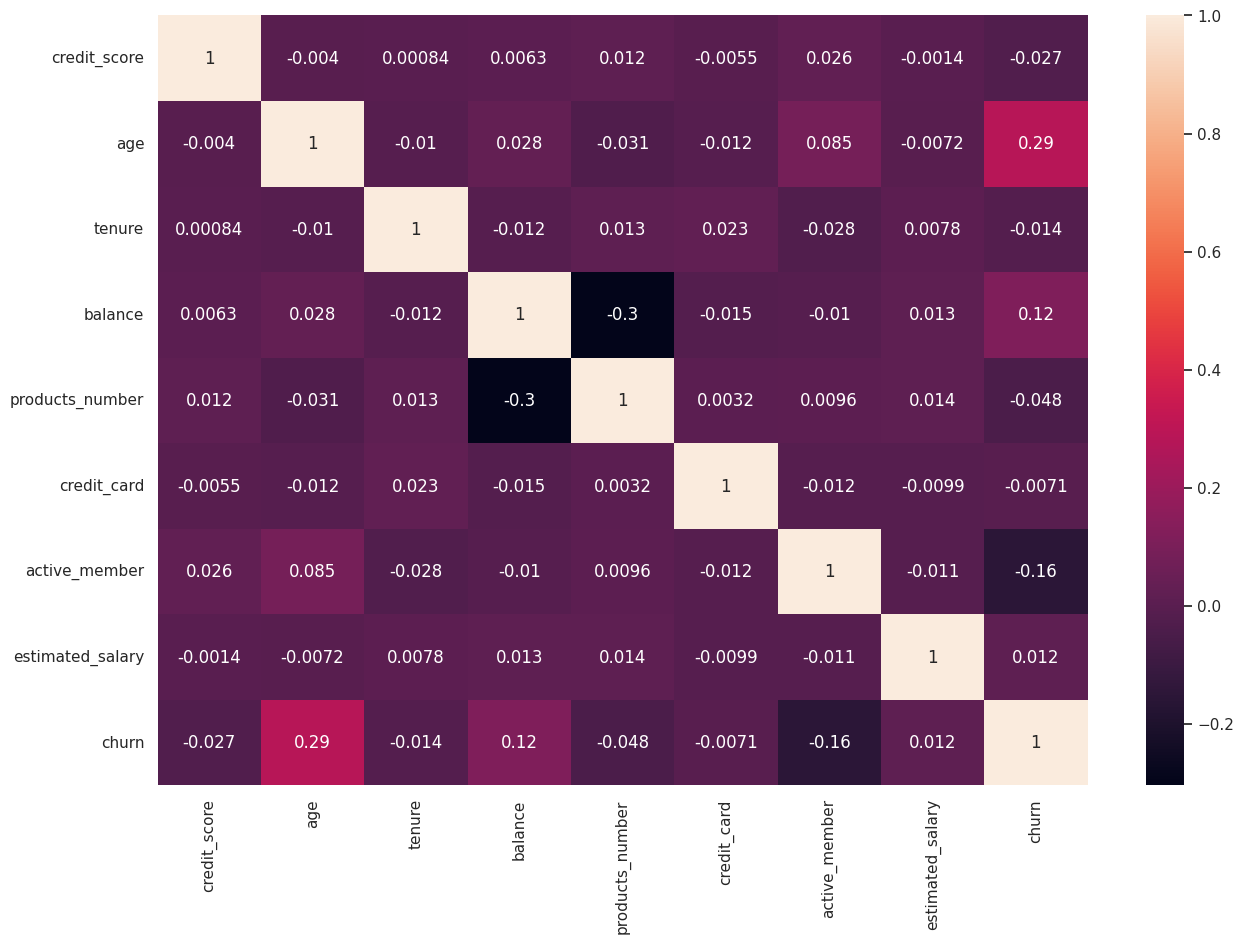

In [405]:
# heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)

- `age` and `active_member` are slightly positively correlated.
- `balance` and `products_number` are negatively correlated.
- `churn` shows some correlation with `age` comparing to other features.

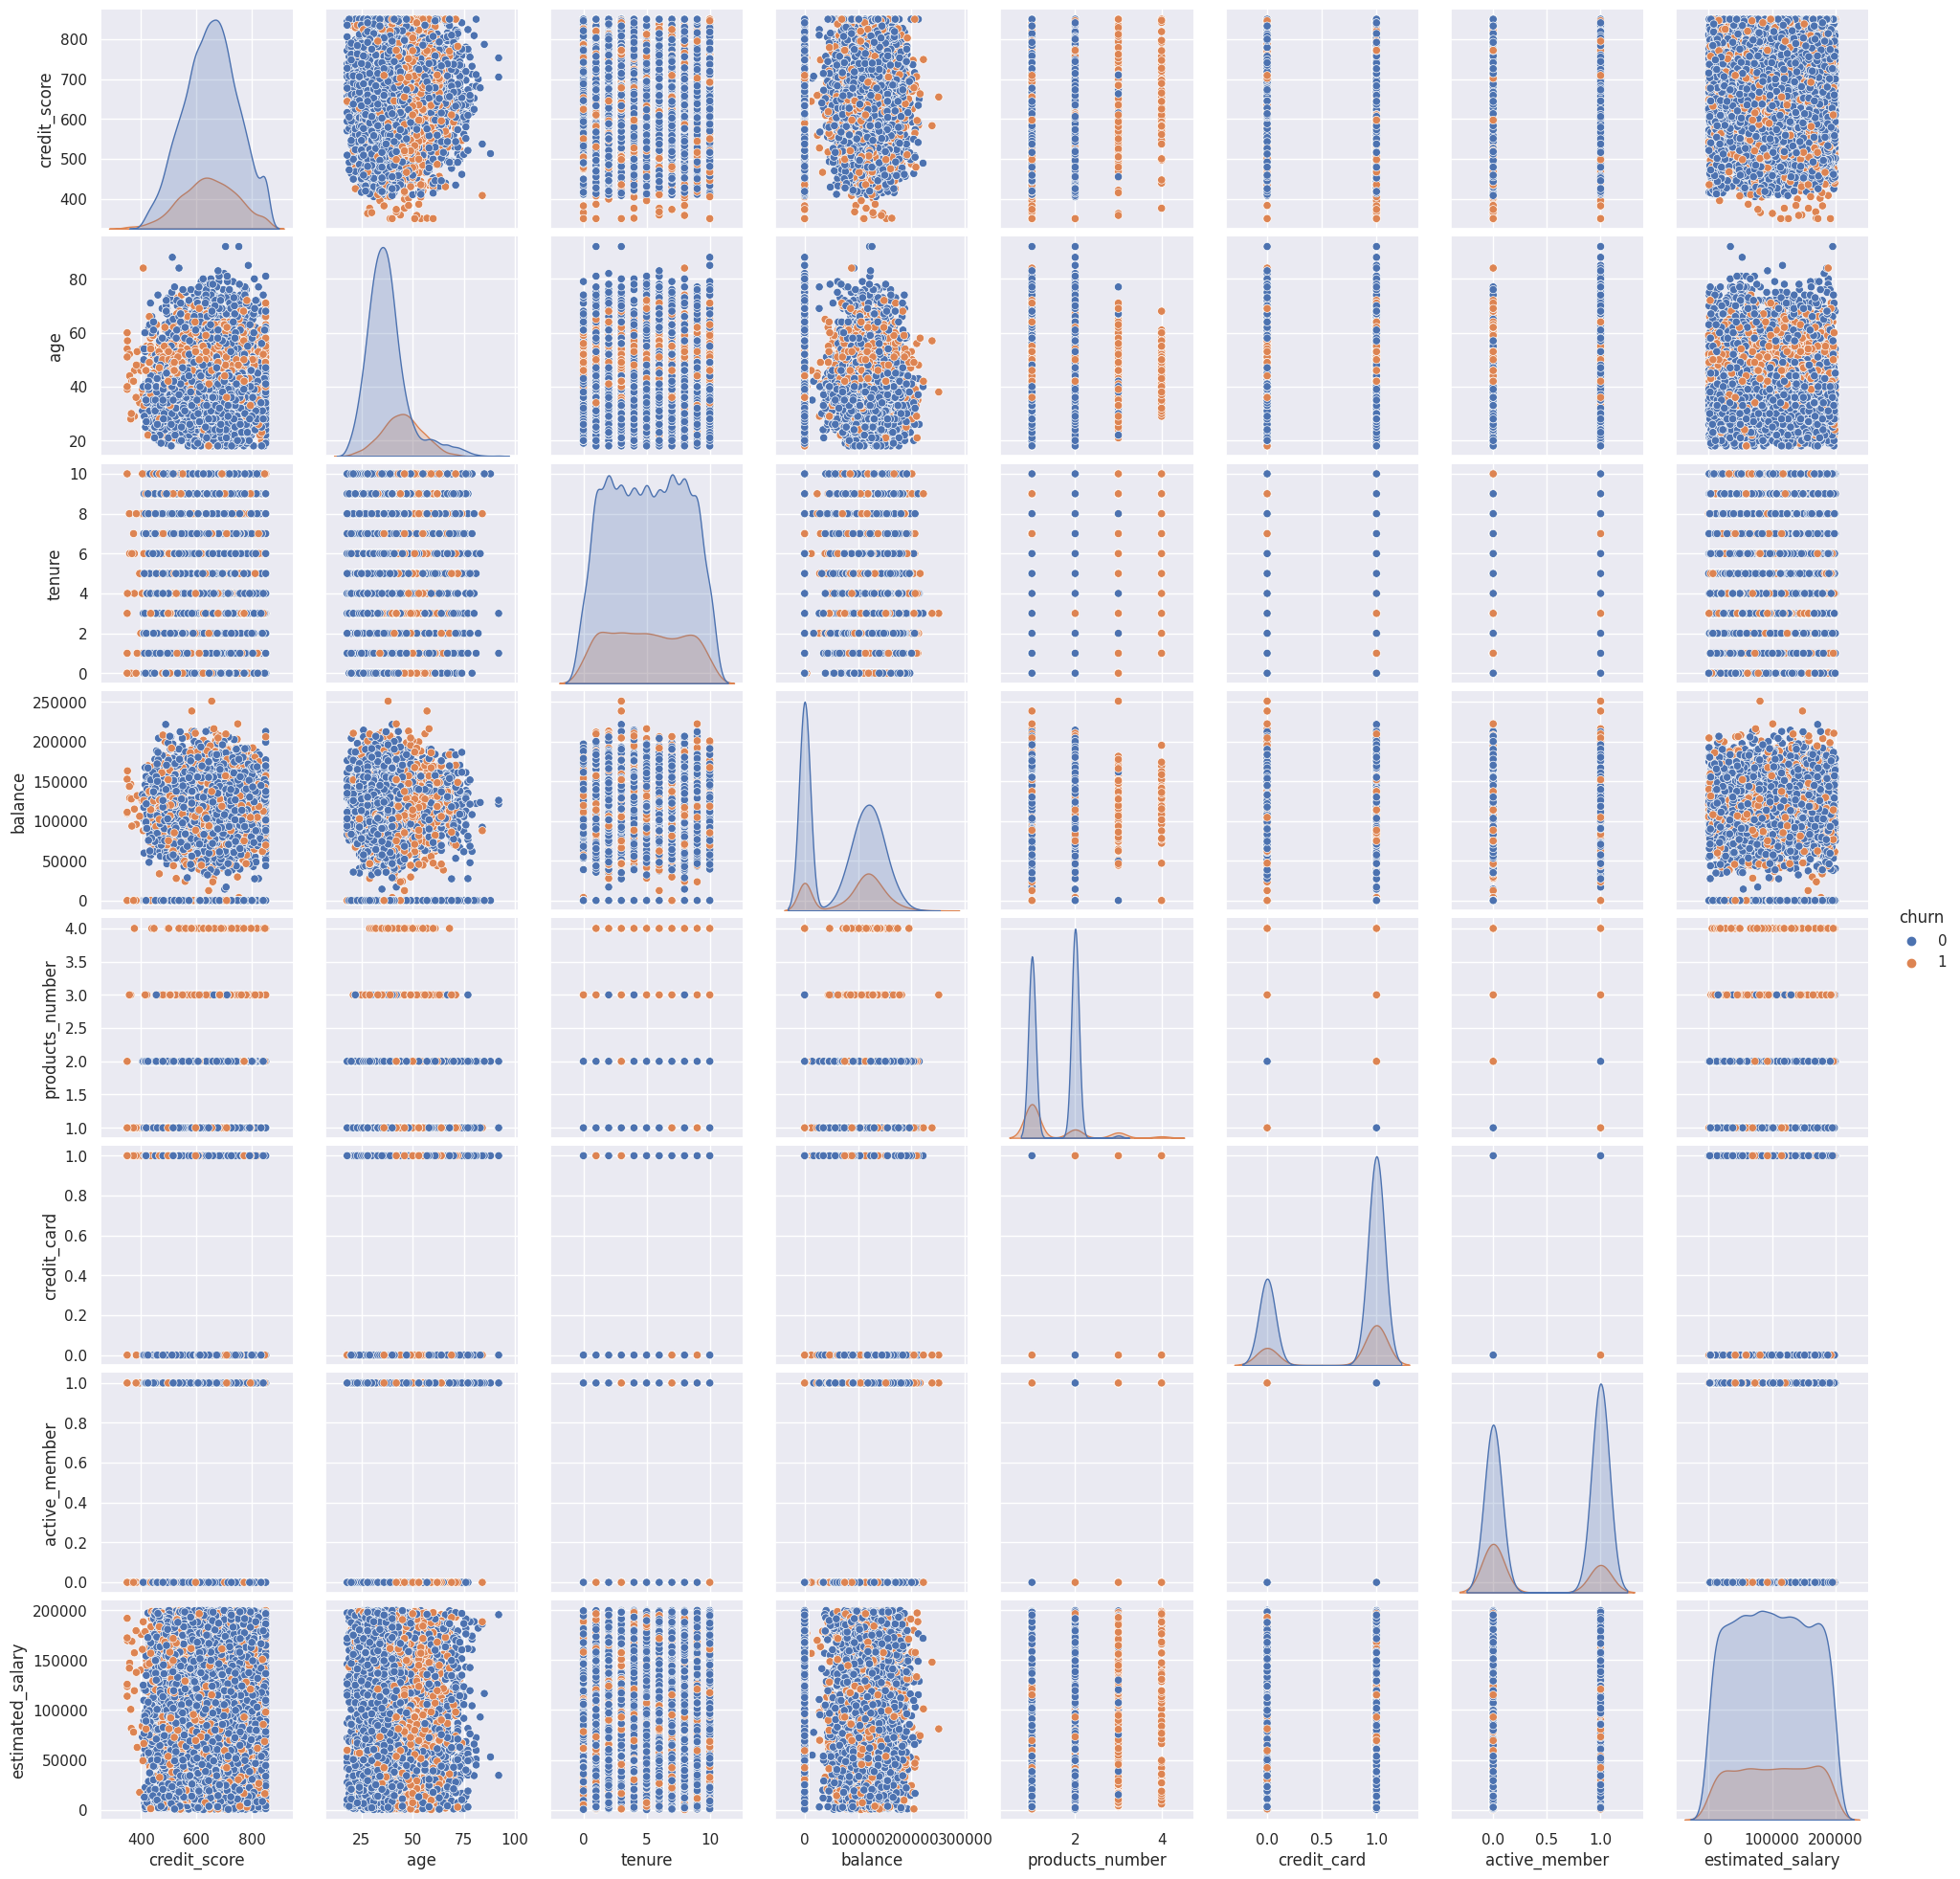

In [406]:
#  To understand relationship between variables
sns.pairplot(df, diag_kind='kde',  hue="churn")

* Correlation matrix shows that `credit_score` have positive correlation with churn.
* We can see that one of our dataset features `estimated_salary` have high positive association with other feature `balance` compare to other numerical features, but it is not that high.
* It seems like there is no significant positve/negative correlation among the features and also with the `churn`.

In [407]:
# saving a copy of df to use it for modeling with outliers
df_with_outliers = df.copy()

#### **Encoding Categorical Data**

In [408]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Here we can observe that there are only 3 unique values in country which are 'France', 'Spain', 'Germany' and will. be converted to numerical values.

In [409]:
#converting the categorical values of gender and country to numerical values
#df = pd.get_dummies(df, prefix='Is', drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.columns:
    # Fit the label encoder to the dataframe column
    le.fit(df[column])
    # Replace the dataframe column with the encoded values
    df[column] = le.transform(df[column])

print(df)

      credit_score  country  gender  age  tenure  balance  products_number  \
0              228        0       0   24       2        0                0   
1              217        2       0   23       1      743                0   
2              111        0       0   24       8     5793                2   
3              308        0       0   21       1        0                1   
4              459        2       0   25       2     3696                0   
...            ...      ...     ...  ...     ...      ...              ...   
9995           380        0       1   21       5        0                1   
9996           125        0       1   17      10      124                0   
9997           318        0       0   18       7        0                0   
9998           381        1       1   24       3      427                1   
9999           401        0       0   10       4     4112                0   

      credit_card  active_member  estimated_salary  churn  
0  

In [410]:
df['country'].unique()

array([0, 2, 1])

Here the categorical features like country where France is denoted by 0 , Germany by 1 & spain by 2 and gender in our dataset is converted to numerical value using the Label Encoder function to build the model which is more accurate.

#### **Outlier handling**

Inter Quantile Range Method:
- IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.
- Q1 (1st Quantile) = df.quantile(0.25)
- Q3 (3rd Quantile)= df.quantile(0.75)
- IQR = Q3-Q1
- LowerLimit = Q1-1.5*IQR
- UpperLimit = Q3+1.5*IQR
why we use 1.5 as a factor --> as Standard Devaiation method, 1 IQR from Q1 & Q2 covers approx ~70% of the data and 2 IQR covers approx ~ 97% of the data. so it is aproximated that 1.5 factor will cover approx ~95% of the data.
Anything outside the`LowerLimit` and `UpperLimit` are can be replaced with Median or Mean or Mode.

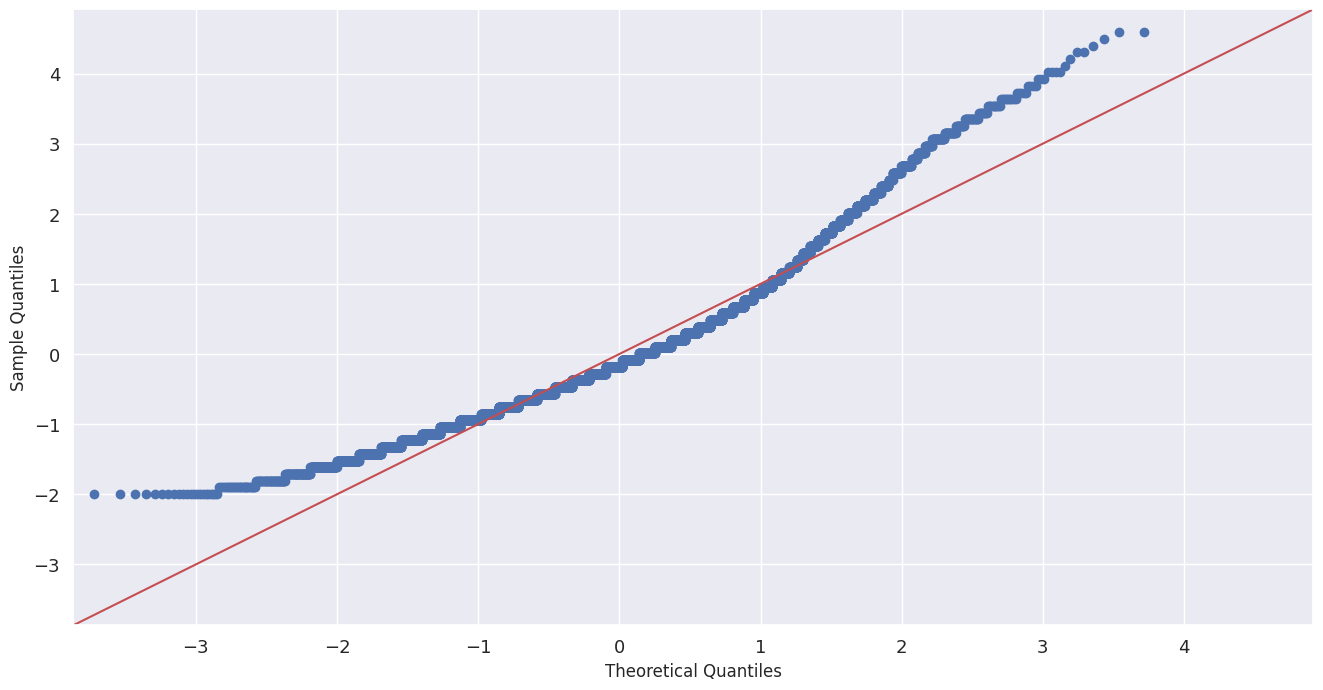

In [411]:
#checking the distribution of feature 'age' before handling the outliers
fig=qqplot(df["age"],line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()

In [412]:
#  using IQR method to impute outliers
def handle_outliers_iqr(df, feature,fac): # df = dataframe , feature = each feature , fac = 1.5 or 2 based on the use case
    Qan1 = df[f"{feature}"].quantile(0.25)
    Qan3 = df[f"{feature}"].quantile(0.75)
    IQR=Qan3-Qan1
    lower_limit=Qan1-fac*IQR
    upper_limit=Qan3+fac*IQR
    df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature] = df[feature].mean()
    return df

In [413]:
handle_outliers_iqr(df , "age" , 1.5)
handle_outliers_iqr(df , "credit_score" , 1.5)

credit_score  country  gender   age  tenure  balance  products_number  \
0            228.0        0       0  24.0       2        0                0   
1            217.0        2       0  23.0       1      743                0   
2            111.0        0       0  24.0       8     5793                2   
3            308.0        0       0  21.0       1        0                1   
4            459.0        2       0  25.0       2     3696                0   
...            ...      ...     ...   ...     ...      ...              ...   
9995         380.0        0       1  21.0       5        0                1   
9996         125.0        0       1  17.0      10      124                0   
9997         318.0        0       0  18.0       7        0                0   
9998         381.0        1       1  24.0       3      427                1   
9999         401.0        0       0  10.0       4     4112                0   

      credit_card  active_member  estimated_salary  churn  
0               1              1              5068      1  
1               0              1              5639      0  
2               1              0              5707      1  
3               0              0              4704      0  
4               1              1              3925      0  
...           ...            ...               ...    ...  
9995            1              0              4827      0  
9996            1              1              5087      0  
9997            0              1              2062      1  
9998            1              0              4639      1  
9999            1              0              1878      0  

[10000 rows x 11 columns]

In [414]:
df[["age"]].describe(), df[["age"]].quantile(0.25), df[["age"]].quantile(0.75)

(                age
 count  10000.000000
 mean      19.832250
 std        8.646199
 min        0.000000
 25%       14.000000
 50%       19.000000
 75%       25.000000
 max       44.000000,
 age    14.0
 Name: 0.25, dtype: float64,
 age    25.0
 Name: 0.75, dtype: float64)

#### **Observations so far:**
* It can be observed the outliers have been removed in age as the previous max value was 92 years and now it is 62 years.
* Also the new mean now is 37.83 but previously with the outliers was 38.92 and the standard deviation dropped by 2.


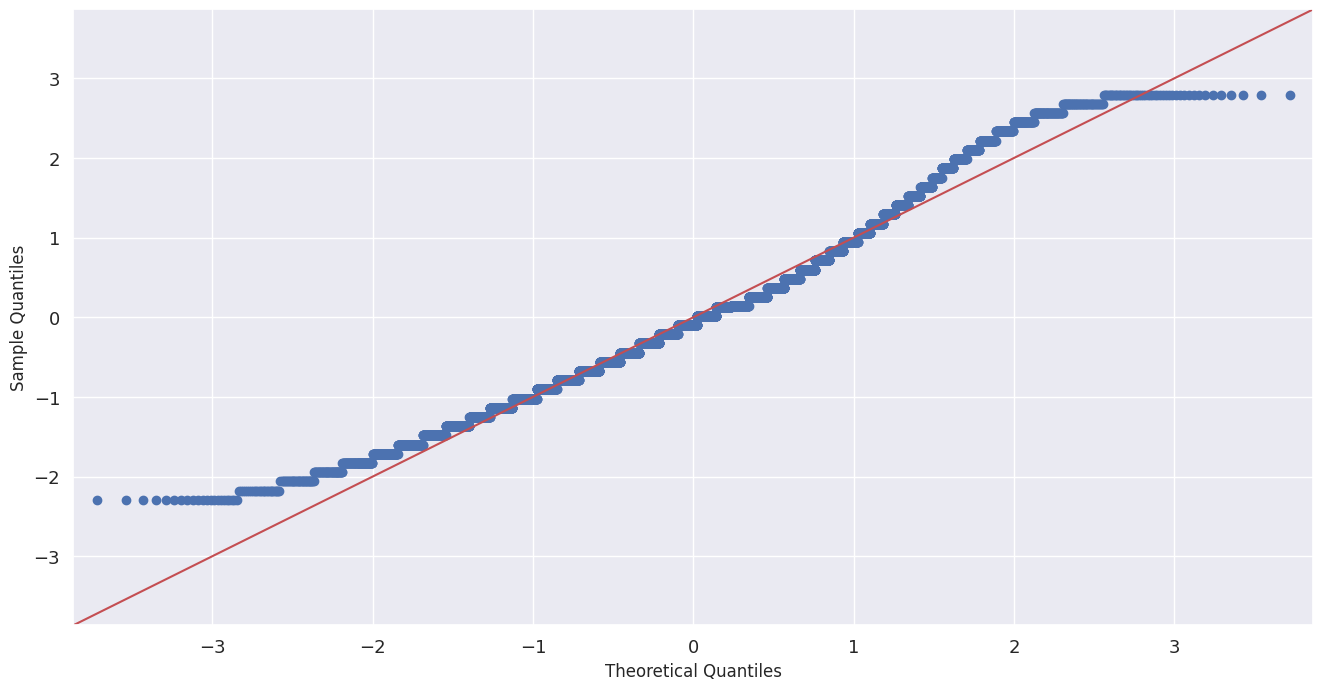

In [415]:
#checking the distribution of independent variable 'age' after removal of outliers
fig=qqplot(df["age"],line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()

The age festure falls under normal distribution after removal of outliers.

In [416]:
df[["credit_score"]].describe(), df[["credit_score"]].quantile(0.25), df[["credit_score"]].quantile(0.75)

(       credit_score
 count  10000.000000
 mean     259.584600
 std       96.496107
 min        0.000000
 25%      193.000000
 50%      261.000000
 75%      327.000000
 max      459.000000,
 credit_score    193.0
 Name: 0.25, dtype: float64,
 credit_score    327.0
 Name: 0.75, dtype: float64)

The outliers in the credit_score feature has also been handled with the removal of outlier in the lower quantile.

#### **Feature Scaling**

#####Do the ranges of the predictor variables make sense?

<Axes: >

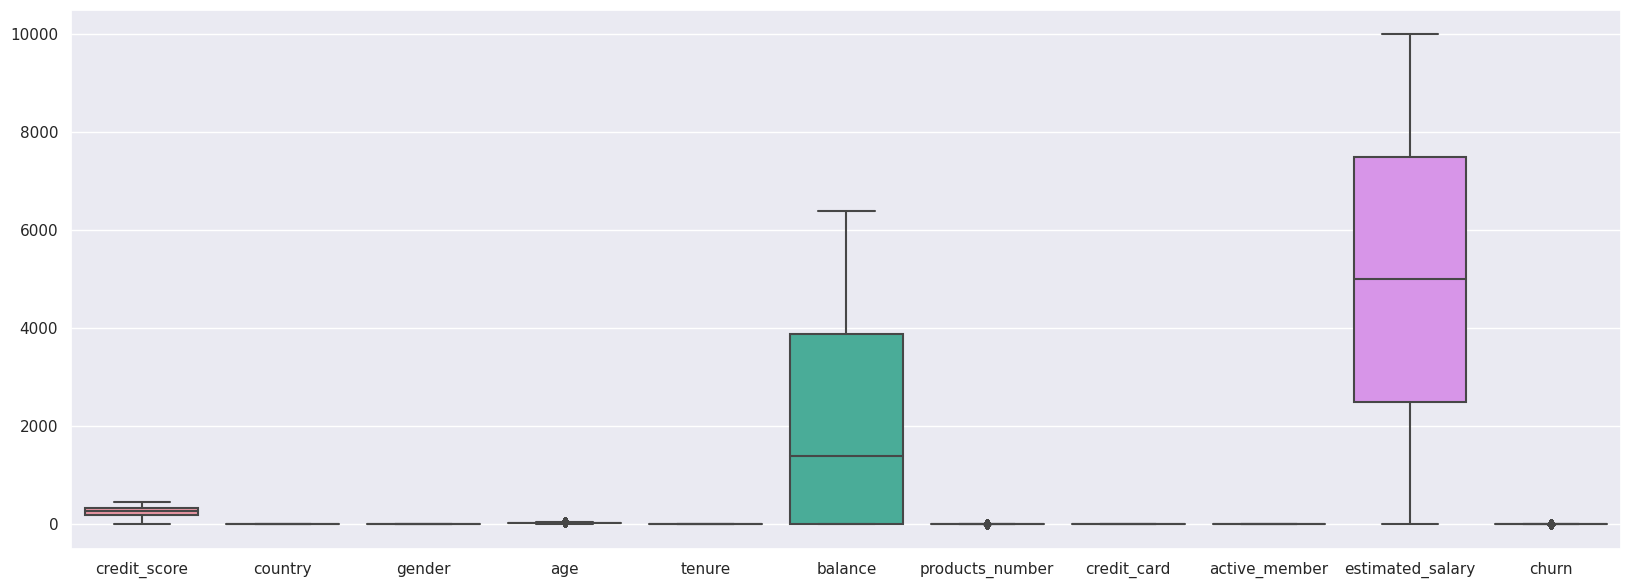

In [417]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df)

#### The above diagram shows that all the predictors are not in the same range. So, it is advisable to scale all the features in same range for better modelling.
#### Scaling can be done in different ways like
1. Normalizing
2. Standardizing

- Normalization is effective when you know that your data is not following a Gaussian distribution(bell curve) and it scales the data in between 0 and 1.
- Standardization can be used when the data follows Gaussian distribution. However it need not necessarily be the exact Gaussian distribution but it is effective on a gaussianlly distributed data.

In [418]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#df=sc.fit_transform(df)
#df

# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

num_feat = ["credit_score","age","tenure","balance","products_number","credit_card","active_member","estimated_salary","churn"]
# Create x to store scaled values as floats
x = df[num_feat].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[num_feat] = pd.DataFrame(x_scaled)




Converting all the features into the same scale

<Axes: >

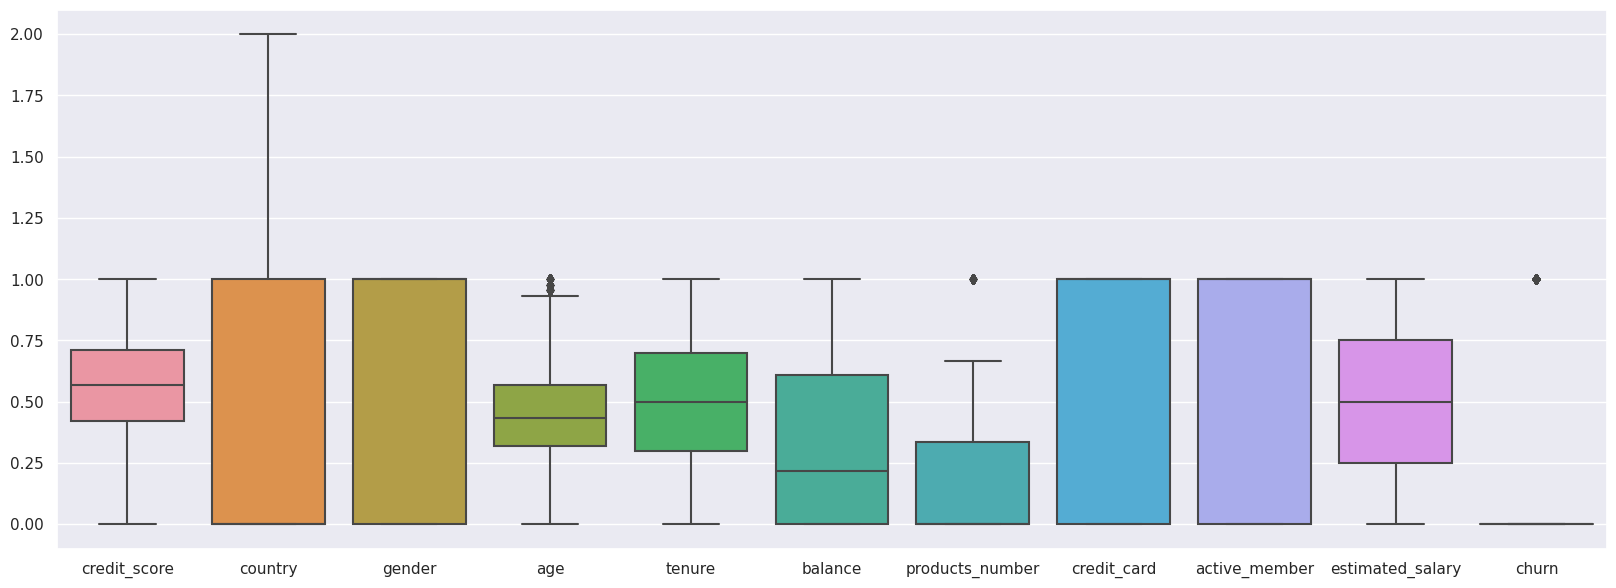

In [419]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df)

All features are in same scale and are comparible.

#### **Feature Importance / Predictor Significance**
#### **Q. Which predictor variables are the most important?**
Few independent variables contribute a lot in predicting target variable and few don't. This can be understood through various methods and helps in eliminating variables that contribute's less in the analysis

##### **HeatMap**
Heatmap shows the magnitude of a feature by visualizing the intensity through colours and helps in understanding features that matters the most

<Axes: >

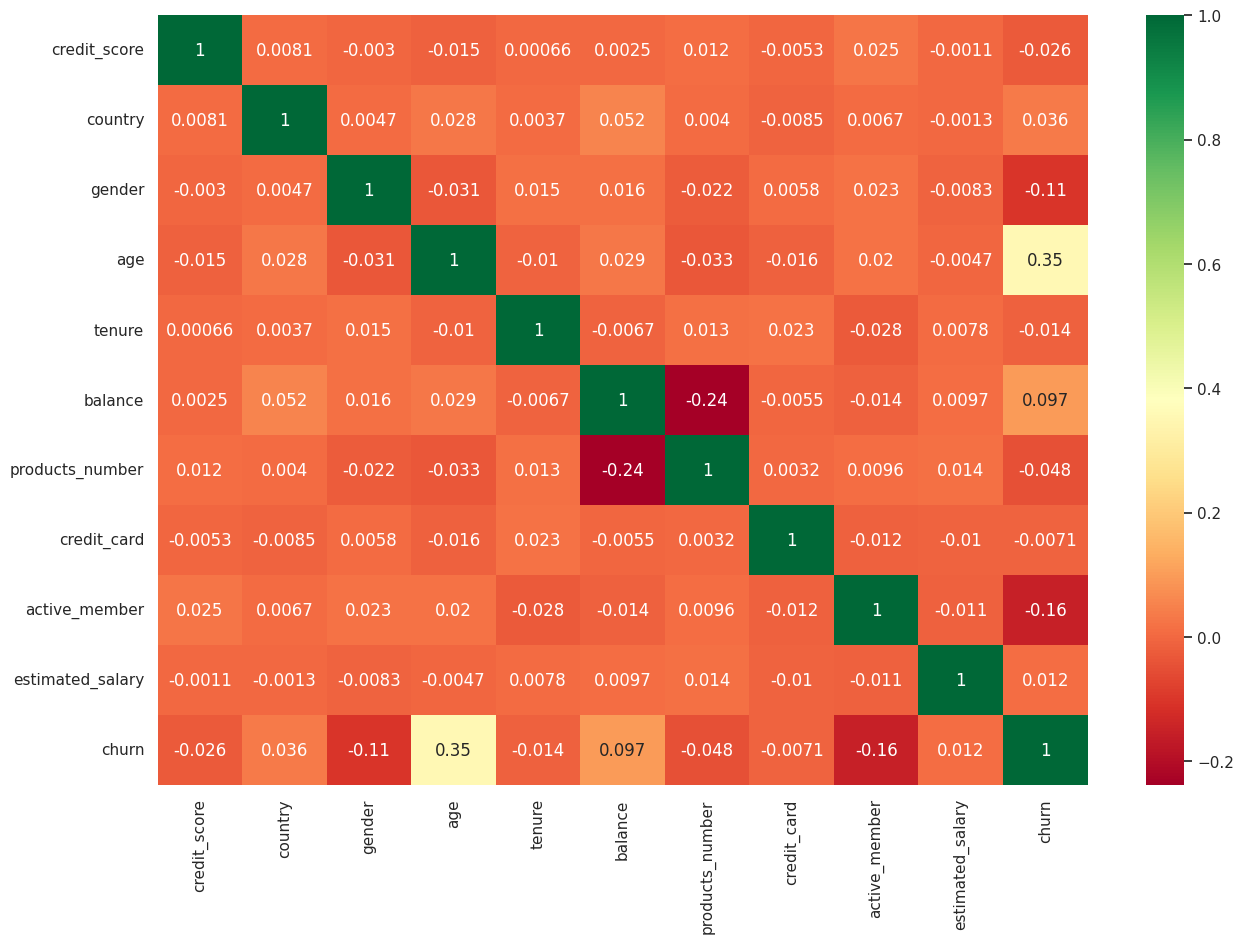

In [420]:
# heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap="RdYlGn")

#### OLS regression

Ordinary Lease Square Regressions tell us relationship between one or more independent variables with a dependent variable

In [421]:
cols = df.columns.tolist()
cols.remove("churn")
model = sm.OLS(df['churn'], df[cols]).fit()
model.summary() #sumarizes the stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  churn   R-squared (uncentered):                   0.337
Model:                            OLS   Adj. R-squared (uncentered):              0.337
Method:                 Least Squares   F-statistic:                              508.8
Date:                Sun, 09 Apr 2023   Prob (F-statistic):                        0.00
Time:                        20:53:07   Log-Likelihood:                         -4175.5
No. Observations:               10000   AIC:                                      8371.
Df Residuals:                    9990   BIC:                                      8443.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
credit_score        -0.0436      0.015     -2.910      0.004      -0.073      -0.014
country              0.0108      0.004      2.459      0.014       0.002       0.019
gender              -0.0778      0.007    -10.785      0.000      -0.092      -0.064
age                  0.7045      0.017     42.231      0.000       0.672       0.737
tenure              -0.0229      0.012     -1.904      0.057      -0.046       0.001
balance              0.0950      0.011      8.528      0.000       0.073       0.117
products_number     -0.0412      0.019     -2.159      0.031      -0.079      -0.004
credit_card         -0.0046      0.008     -0.602      0.547      -0.020       0.010
active_member       -0.1304      0.007    -18.020      0.000      -0.145      -0.116
estimated_salary     0.0098      0.012      0.819      0.413      -0.014       0.033
==============================================================================
Omnibus:                     1484.121   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2247.910
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                       3.256   Cond. No.                         9.34
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **Pointes to be noted:**
Considering the significance value of 0.05 according to the rule of thumb in statistics.

* `credit_score` has the p-value 0.04, which is lesser and hence it is a **significant** feature.
* `country` has the p-value 0.014, which is lesser and hence it is a **significant** feature.
* `gender` has the p-value 0, which is lesser and hence it is a **significant** feature.
*  `age` has the p-value 0, which is lesser and hence it is a **significant** feature.
*  `tenure` has the p-value 0.057, which is which is slightly more than the threshold value of 0.05 and hence it is a **non-significant** feature.
* `balance` has the p-value 0, which is lesser and hence it is a **significant** feature.
* `products_number` has the p-value 0.031, which is lesser and hence it is a **significant** feature.
* `credit_card` has the p-value 0.547, which is greater than the significant value i.e 0.05 and hence it is a **non-significant** feature.
* `active_member` has the p-value 0, which is lesser and hence it is a **significant** feature.
* `estimated_salary` has the p-value 0.413, which is greater and hence it is a **non-significant** feature.

#### **Permutation Importance : Let's calculate Feature weights using Permutation Importance.**

In [422]:
def get_permutation_importance(df):
    X = df[["credit_score","age","tenure","balance","products_number","credit_card","active_member","estimated_salary"]]
    y = df[["churn"]]
    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.10, random_state=1)
    # Create linear regression object
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)
    pi = PermutationImportance(model, random_state=1).fit(X_test, y_test)
    return eli5.show_weights(pi, feature_names = X_test.columns.tolist())



#  https://scikit-learn.org/stable/modules/permutation_importance.html

In [423]:
get_permutation_importance(df)

It can be observed that we can drop `credit_card` and `estimated_salary` features for prediction modelling as they are non-significant in determining the `churn` feature. 

In [424]:
df = df.drop(['credit_card', 'estimated_salary'],axis = 1)
df

credit_score  country  gender       age  tenure   balance  \
0         0.496732        0       0  0.545455     0.2  0.000000   
1         0.472767        2       0  0.522727     0.1  0.116439   
2         0.241830        0       0  0.545455     0.8  0.907851   
3         0.671024        0       0  0.477273     0.1  0.000000   
4         1.000000        2       0  0.568182     0.2  0.579220   
...            ...      ...     ...       ...     ...       ...   
9995      0.827887        0       1  0.477273     0.5  0.000000   
9996      0.272331        0       1  0.386364     1.0  0.019433   
9997      0.692810        0       0  0.409091     0.7  0.000000   
9998      0.830065        1       1  0.545455     0.3  0.066917   
9999      0.873638        0       0  0.227273     0.4  0.644413   

      products_number  active_member  churn  
0            0.000000            1.0    1.0  
1            0.000000            1.0    0.0  
2            0.666667            0.0    1.0  
3            0.333333            0.0    0.0  
4            0.000000            1.0    0.0  
...               ...            ...    ...  
9995         0.333333            0.0    0.0  
9996         0.000000            1.0    0.0  
9997         0.000000            1.0    1.0  
9998         0.333333            0.0    1.0  
9999         0.000000            0.0    0.0  

[10000 rows x 9 columns]

##### **What are the distributions of the predictor variables?**

<Figure size 600x400 with 0 Axes>

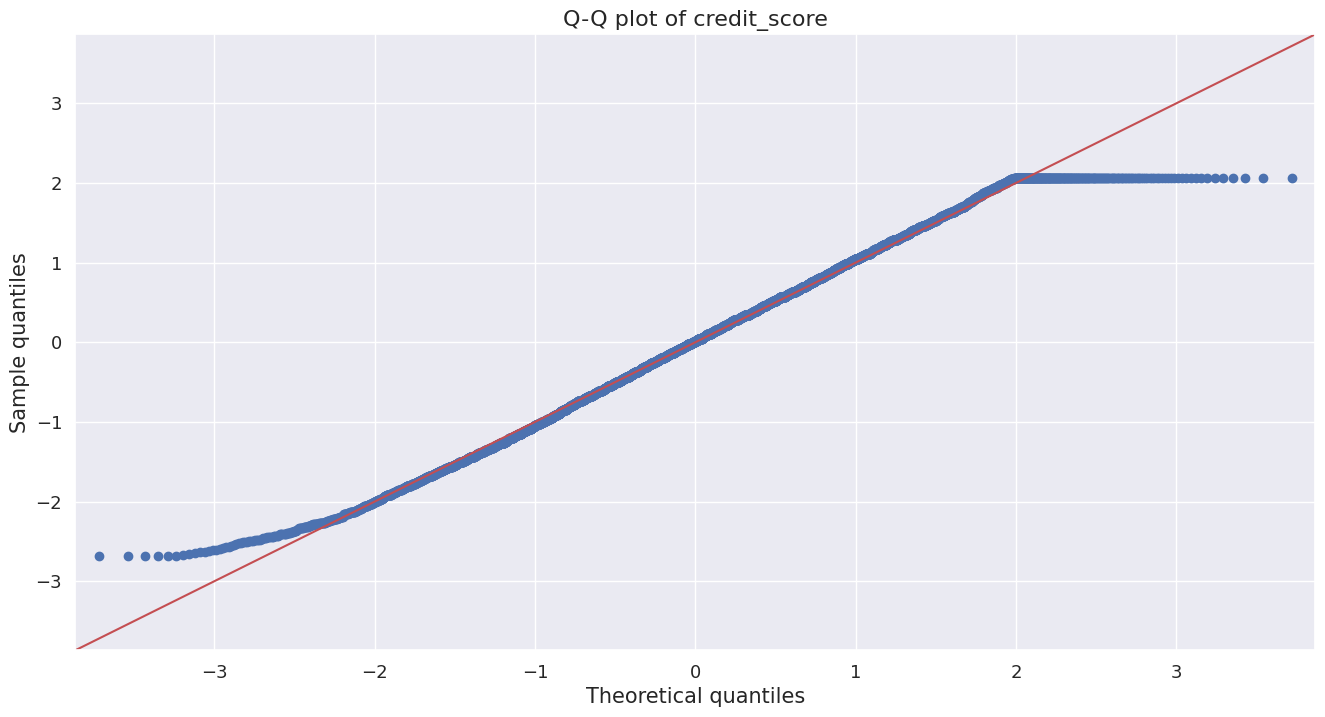

<Figure size 600x400 with 0 Axes>

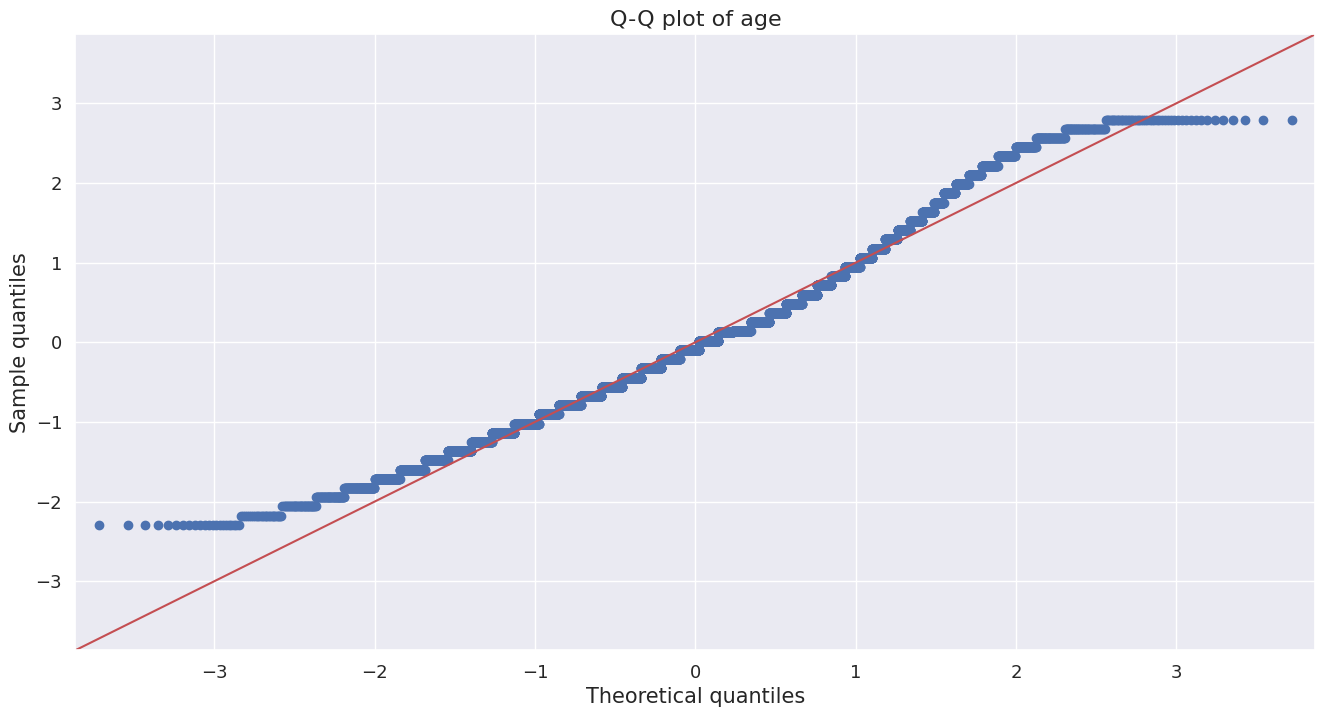

<Figure size 600x400 with 0 Axes>

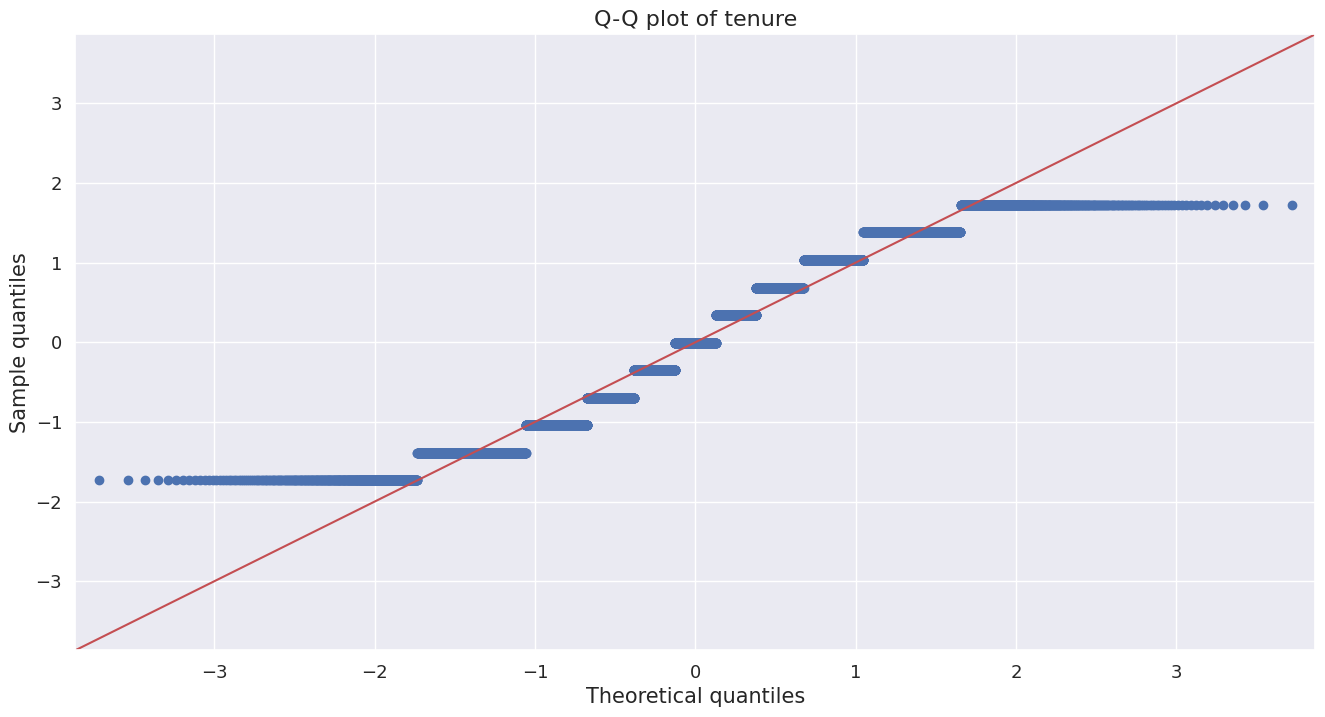

<Figure size 600x400 with 0 Axes>

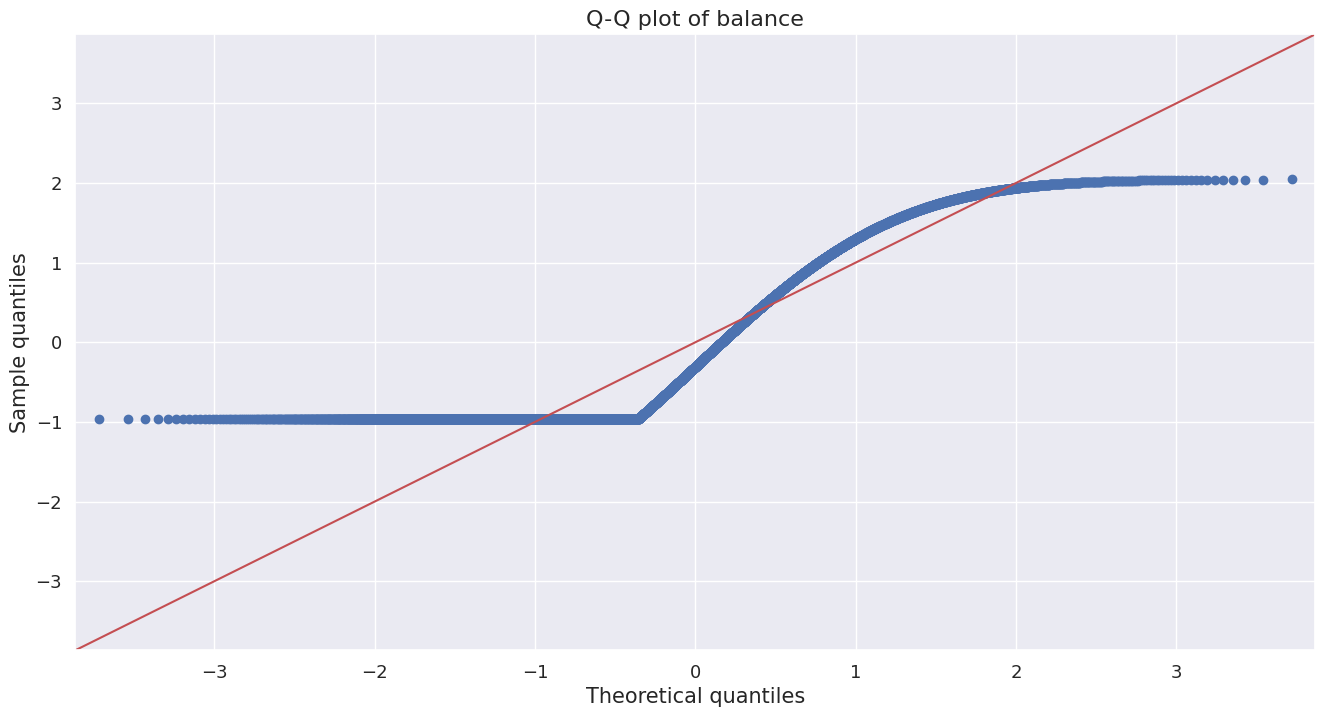

<Figure size 600x400 with 0 Axes>

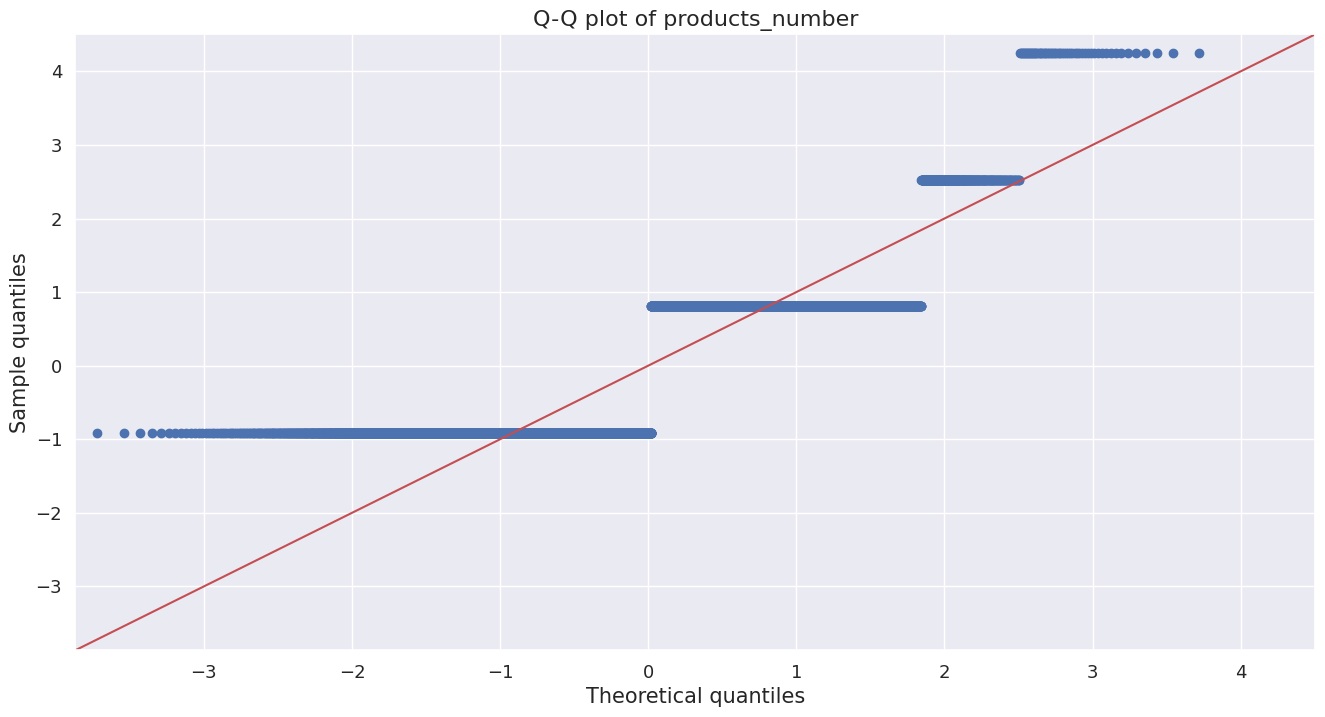

<Figure size 600x400 with 0 Axes>

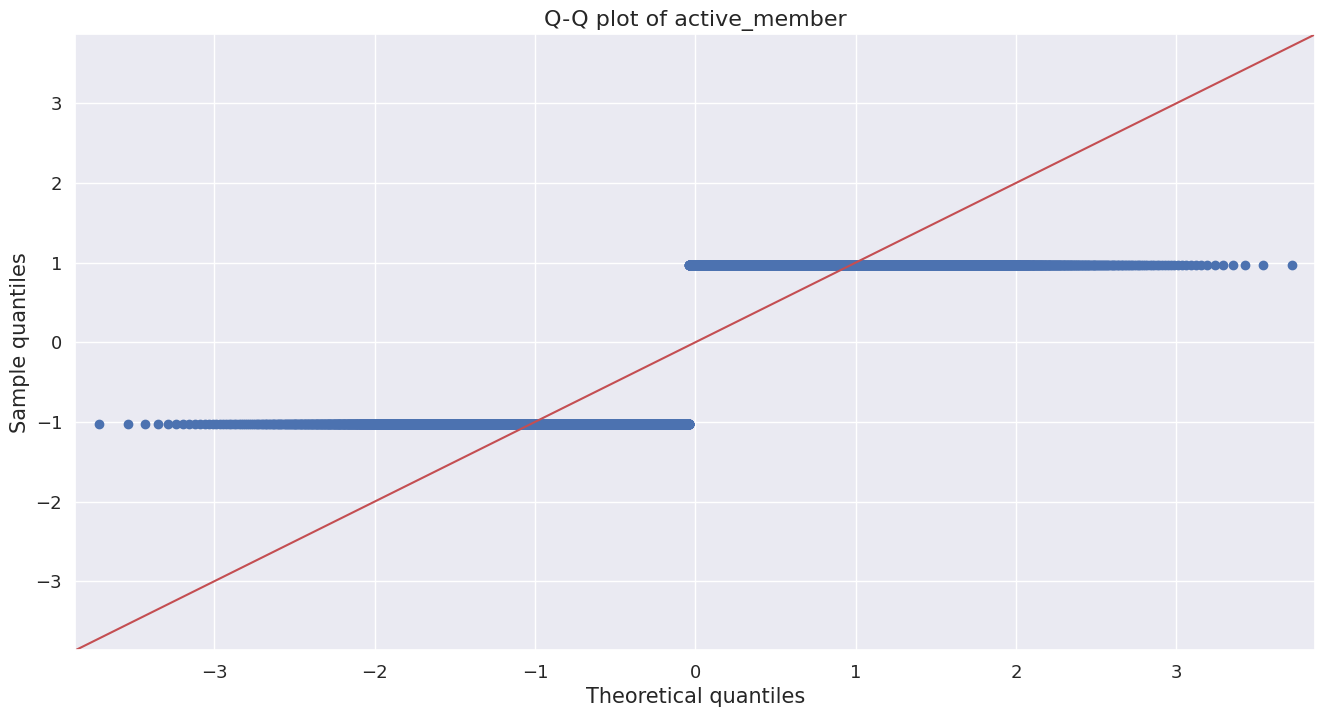

In [425]:
#checking the distribution of predictor variables
from statsmodels.graphics.gofplots import qqplot
norm_dist_data=df[['credit_score','age','tenure','balance','products_number','active_member']]
for c in norm_dist_data.columns[:]:
  plt.figure(figsize=(6,4))
  fig=qqplot(df[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

* By observing the Q-Q plots, it appears that all predictor variables are roughly following the normal distribution
* `active_member` is categorical value and have 2 different values namely 0 and 1 and `product_number` is limited to a set of 4 values.


#### **Oversampling**


Data in target variable is not balanced so over sampling is required and it helps in building a model with decent scores

In [426]:
class_Fail = df[df['churn'] == 0]
class_No_Fail = df[df['churn'] == 1]
class_No_Fail = class_No_Fail.sample(len(class_Fail),replace=True)
over_sampled_df = pd.concat([class_Fail, class_No_Fail], axis=0)


print('OverSampled Data Distribution:\n',over_sampled_df['churn'].value_counts())

OverSampled Data Distribution:
 0.0    7963
1.0    7963
Name: churn, dtype: int64


In [427]:
over_sampled_df

credit_score  country  gender       age  tenure   balance  \
1         0.472767        2       0  0.522727     0.1  0.116439   
3         0.671024        0       0  0.477273     0.1  0.000000   
4         1.000000        2       0  0.568182     0.2  0.579220   
6         0.938998        0       1  0.727273     0.7  0.000000   
8         0.239651        0       1  0.590909     0.4  0.777621   
...            ...      ...     ...       ...     ...       ...   
6717      0.592593        2       0  0.909091     0.5  0.999373   
8952      0.379085        1       0  0.659091     1.0  0.753644   
2181      0.529412        1       0  0.636364     0.5  0.551951   
1670      0.366013        2       1  0.136364     0.3  0.432848   
851       0.601307        1       0  0.681818     0.1  0.216424   

      products_number  active_member  churn  
1            0.000000            1.0    0.0  
3            0.333333            0.0    0.0  
4            0.000000            1.0    0.0  
6            0.333333            1.0    0.0  
8            0.333333            1.0    0.0  
...               ...            ...    ...  
6717         0.000000            1.0    1.0  
8952         0.000000            0.0    1.0  
2181         0.000000            1.0    1.0  
1670         0.000000            0.0    1.0  
851          0.333333            0.0    1.0  

[15926 rows x 9 columns]

Oversampling involves supplementing the training data with multiple copies of some of the minority classes 

#### **Splitting the dataset into Training and Test set**

In [428]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

independent_cols = ["credit_score","country","gender","age","tenure","balance","products_number","active_member"]

X = over_sampled_df[independent_cols]
y = over_sampled_df["churn"]
# using the train test split function
#X_train ,X_test ,y_train ,y_test = train_test_split(X,y,train_size=0.8,random_state=42,startify=y)
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=42,train_size=0.8,stratify=y)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
      credit_score  country  gender       age  tenure   balance  \
915       0.446623        0       1  0.659091     0.6  0.000000   
8147      0.546841        1       0  0.477273     0.8  0.617615   
3666      0.675381        2       0  0.068182     0.9  0.000000   
6336      0.315904        1       0  0.386364     0.4  0.522489   
2455      0.588235        0       1  0.659091     0.5  0.000000   

      products_number  active_member  
915          0.000000            0.0  
8147         0.000000            0.0  
3666         0.333333            1.0  
6336         0.000000            0.0  
2455         0.000000            1.0  

X_test : 
      credit_score  country  gender       age  tenure   balance  \
809       0.579521        0       0  0.431818     0.6  0.202163   
9677      0.725490        1       1  0.340909     0.4  0.140730   
2592      0.248366        1       1  0.500000     0.6  0.010500   
2513      0.599129        0       1  0.477273     1.0  0.000000   
8405  

In [429]:
# Looking the data for test and training 
	
independent_cols = ["credit_score","age","tenure","balance","products_number","active_member"]
X_test_plot = X_test[independent_cols]
X_train_plot = X_train[independent_cols]

check_df = pd.merge(
    X_train,
    X_test,
    on=[
        "country","gender","credit_score","age","tenure","balance","products_number","active_member",],
    how="left",
    indicator="Exist",
)
#check_df.drop("Item_Outlet_Sales", inplace=True, axis=1)
check_df["Exist"] = np.where(check_df.Exist == "both", True, False)
print(
    check_df["Exist"].value_counts()
)  # This code prints the number of unique data rows in training colomns



False    9259
True     5101
Name: Exist, dtype: int64


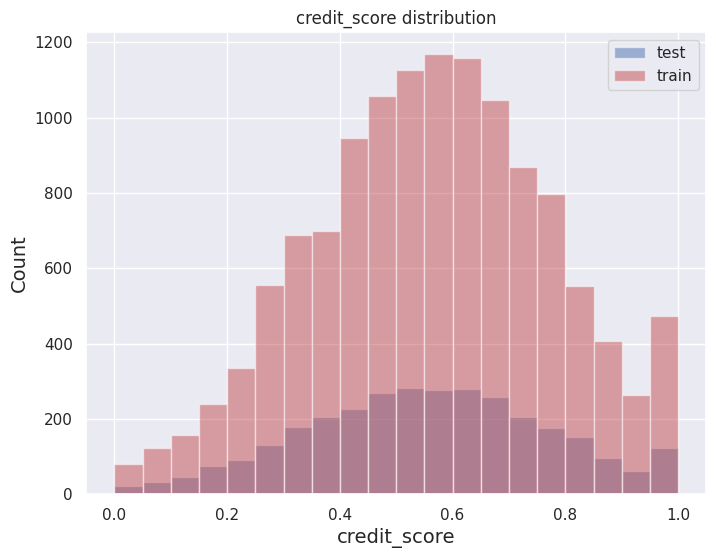

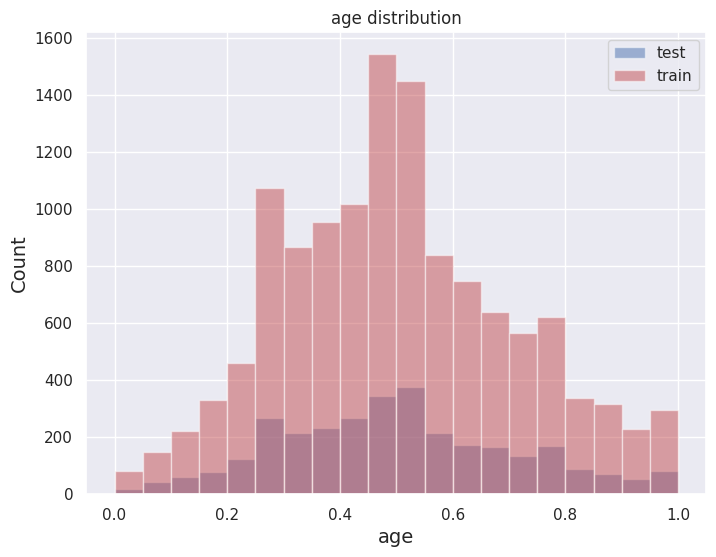

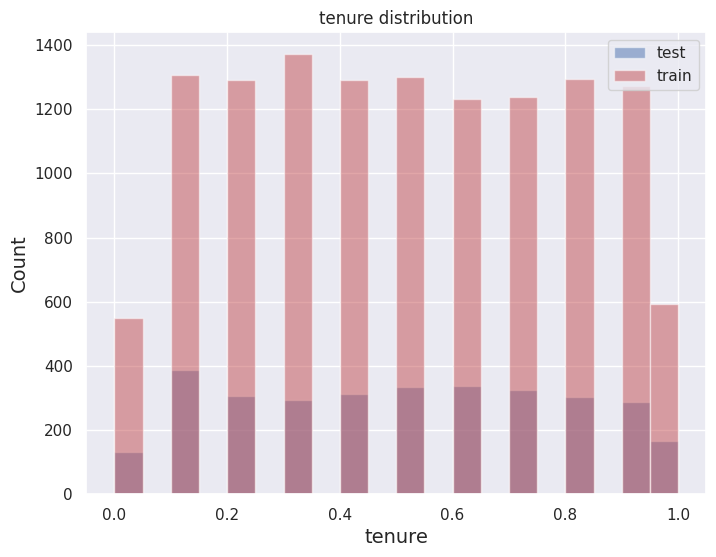

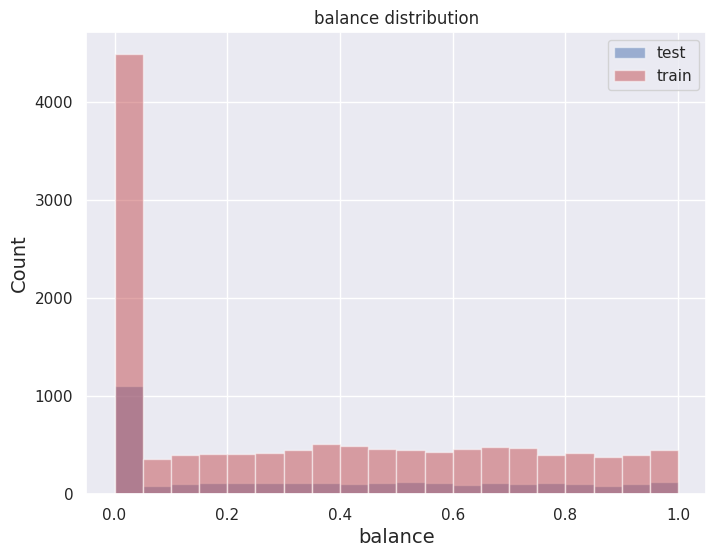

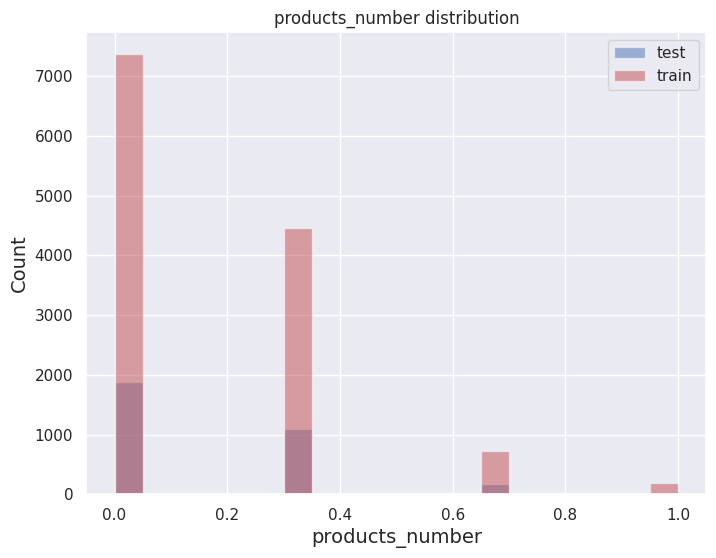

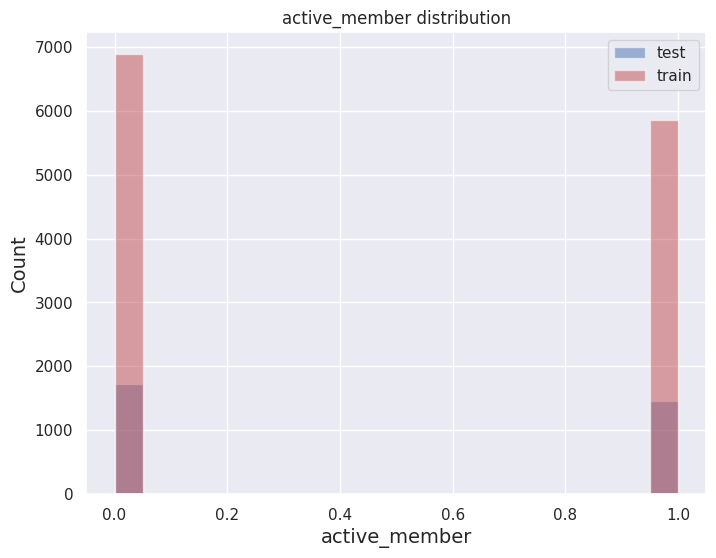

In [430]:
# Plotting the data to see the histogram
for col in X_test_plot.columns[:]:
    plt.figure(figsize=(8,6))
    
    plt.hist(X_test_plot[col], bins=20, alpha=0.5, label="test",color = 'b')
    plt.hist(X_train_plot[col], bins=20, alpha=0.5, label="train",color = 'r')
    plt.xlabel(col, size=14)
    plt.ylabel("Count", size=14)
    
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(col))
    plt.show()

#### **Do the training and test sets have the same data?**

Yes, from above graphs its evident that the distributions are almost same for all train and test sets except few mid values in `credit_score` and `age`.

## **Modeling**

##### **With imputed outliers**

In [431]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)

#printing the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-1.71898756]
The coefficient b1=  [[-0.36298337  0.12319624 -0.54637915  4.66446335 -0.15935843  0.82849466
  -0.22300293 -0.82359206]]


In [432]:
lr_y_predict = modelLogistic.predict(X_test)

print("Model Performance with Test set")

d = [ ["Accuracy_score", f'{round(accuracy_score(y_test,lr_y_predict),2)}'],
     ["Precission_score", f'{round(precision_score(y_test,lr_y_predict),2)}'],
     ["Recall_score", f'{round(recall_score(y_test,lr_y_predict),2)}'],
     ["F1-score",f'{round(f1_score(y_test,lr_y_predict),2)}']]

print(tabulate(d, headers=["Metrics", "Score"]))

print("-----------------------------------------------")


Model Performance with Test set
Metrics             Score
----------------  -------
Accuracy_score       0.7
Precission_score     0.71
Recall_score         0.69
F1-score             0.7
-----------------------------------------------


#### **Summary till now:**
**EDA** - verify data distribution, box plots, heat maps (just numerical), so far no encoding, will know missing and outliers

- missing values imputed for both category and numerical data, outlier handling, and scaling (needs outlier handling to avoid skewness)
- for category encoding

We have completed all numerical data eda and preparation.

- now check heatmap with all numerical data , and ols regression , VIF for knowing more dependent feature.
so far features selected 


train test split
permutation 
remove feature from train and test for modeling

make sure that we have same distritbution in train and test

- check if train test val have same distribution before final modeling




#### **With Outliers**

In dataframe `df_with_outliers` which has outliers , we converting the categorical values of gender and country to numerical values.

In [433]:
df_with_outliers.head()

credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

In [434]:
#converting the categorical values of gender and country to numerical values in dataset with outliers
#df = pd.get_dummies(df, prefix='Is', drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df_with_outliers.columns:
    # Fit the label encoder to the dataframe column
    le.fit(df_with_outliers[column])
    # Replace the dataframe column with the encoded values
    df_with_outliers[column] = le.transform(df_with_outliers[column])

print(df_with_outliers)

      credit_score  country  gender  age  tenure  balance  products_number  \
0              228        0       0   24       2        0                0   
1              217        2       0   23       1      743                0   
2              111        0       0   24       8     5793                2   
3              308        0       0   21       1        0                1   
4              459        2       0   25       2     3696                0   
...            ...      ...     ...  ...     ...      ...              ...   
9995           380        0       1   21       5        0                1   
9996           125        0       1   17      10      124                0   
9997           318        0       0   18       7        0                0   
9998           381        1       1   24       3      427                1   
9999           401        0       0   10       4     4112                0   

      credit_card  active_member  estimated_salary  churn  
0  

The features `country` and `gender` have been converted to numerical notations to predict accuracy of dataframe with outliers.

#### **Oversampling with outliers**

In [435]:
class_Fail_out = df_with_outliers[df_with_outliers['churn'] == 0]
class_No_Fail_out = df_with_outliers[df_with_outliers['churn'] == 1]
class_No_Fail_out = class_No_Fail_out.sample(len(class_Fail_out),replace=True)
over_sampled_df_out = pd.concat([class_Fail_out, class_No_Fail_out], axis=0)


print('OverSampled Data Distribution:\n',over_sampled_df_out['churn'].value_counts())

OverSampled Data Distribution:
 0    7963
1    7963
Name: churn, dtype: int64


In [436]:
df_with_outliers = df_with_outliers.drop(['credit_card', 'estimated_salary'],axis = 1)
df_with_outliers

credit_score  country  gender  age  tenure  balance  products_number  \
0              228        0       0   24       2        0                0   
1              217        2       0   23       1      743                0   
2              111        0       0   24       8     5793                2   
3              308        0       0   21       1        0                1   
4              459        2       0   25       2     3696                0   
...            ...      ...     ...  ...     ...      ...              ...   
9995           380        0       1   21       5        0                1   
9996           125        0       1   17      10      124                0   
9997           318        0       0   18       7        0                0   
9998           381        1       1   24       3      427                1   
9999           401        0       0   10       4     4112                0   

      active_member  churn  
0                 1      1  
1                 1      0  
2                 0      1  
3                 0      0  
4                 1      0  
...             ...    ...  
9995              0      0  
9996              1      0  
9997              1      1  
9998              0      1  
9999              0      0  

[10000 rows x 9 columns]

#### **Train , Test and Validation split with outliers**





In [437]:
independent_cols = ["credit_score","country","gender","age","tenure","balance","products_number","active_member"]
X_out = over_sampled_df_out[independent_cols]
y_out = over_sampled_df_out["churn"]
# splitting train and test data
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, random_state=1,train_size=0.8,stratify=y)


In [438]:
modelLogistic_out = LogisticRegression()
modelLogistic_out.fit(X_train_out,y_train_out)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [439]:
lr_y_predict_out = modelLogistic_out.predict(X_test_out)

print("Model Performance with Test set")

d = [ ["Accuracy_score", f'{round(accuracy_score(y_test_out,lr_y_predict_out),2)}'],
     ["Precission_score", f'{round(precision_score(y_test_out,lr_y_predict_out),2)}'],
     ["Recall_score", f'{round(recall_score(y_test_out,lr_y_predict_out),2)}'],
     ["F1-score",f'{round(f1_score(y_test_out,lr_y_predict_out),2)}']]

print(tabulate(d, headers=["Metrics", "Score"]))
print("-----------------------------------------------")

Model Performance with Test set
Metrics             Score
----------------  -------
Accuracy_score       0.69
Precission_score     0.69
Recall_score         0.69
F1-score             0.69
-----------------------------------------------


#####  **Q. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

Yes, it does have a small difference in scores with and with out outliers.


- All the four scores `Accuracy_score` , `Precision_score` , `Recall_score` and `F1-score` are on the lower end when compared to scores with outlier imputation.

- `Accuracy_score` , `Precision_score` and `F1-score` are improved by 3% and `Recall_score` improved by 2% with outlier imputation.

To conclude, there is an improvement in scores with imputed outliers. This can possibly be due to better distribution after outlier imputation.

#### **Imputing Null values**

In [440]:
def null_impute_with_mean(percent , feature , impute_feature):
    df_null = df_copy.copy()
    df_null[f"{impute_feature}"] = df_null[f"{feature}"]

    df_null.loc[df_null.sample(frac=percent).index,f'{impute_feature}'] = np.NaN

    # Imputing Null values with mean

    df_null[f"{impute_feature}"] = df_null[f"{impute_feature}"].fillna(df_null[f"{impute_feature}"].mean()) 
    mse = mean_squared_error(df_null[f"{feature}"], df_null[f"{impute_feature}"])

    print(f"Error after imputing {percent*100} values is {round(mse,2)*100}%")

In [441]:
#  Removing 1% data and imputing
null_impute_with_mean(0.01 ,"active_member" ,"active_member_imputed")

Error after imputing 1.0 values is 0.0%


In [442]:
#  Removing 5% data and imputing with mean

null_impute_with_mean(0.05 ,"active_member" ,"active_member_imputed")

Error after imputing 5.0 values is 1.0%


In [443]:
#  Removing 10% data and imputing

null_impute_with_mean(0.10 ,"active_member" ,"active_member_imputed")

Error after imputing 10.0 values is 2.0%


In [444]:
def null_impute_with_median(percent , feature , impute_feature):
    df_null = df_copy.copy()
    df_null[f"{impute_feature}"] = df_null[f"{feature}"]

    df_null.loc[df_null.sample(frac=percent).index,f'{impute_feature}'] = np.NaN

    # Imputing Null values with median

    df_null[f"{impute_feature}"] = df_null[f"{impute_feature}"].fillna(df_null[f"{impute_feature}"].median()) 
    mede = mean_squared_error(df_null[f"{feature}"], df_null[f"{impute_feature}"])

    print(f"Error after imputing {percent*100} values is {round(mede,2)*100}%")

In [445]:
null_impute_with_median(0.01 ,"active_member" ,"active_member_imputed")

Error after imputing 1.0 values is 0.0%


In [446]:
#  Removing 5% data and imputing with median

null_impute_with_median(0.05 ,"active_member" ,"active_member_imputed")

Error after imputing 5.0 values is 2.0%


In [447]:
#  Removing 10% data and imputing with median

null_impute_with_median(0.10 ,"active_member" ,"active_member_imputed")

Error after imputing 10.0 values is 5.0%


##### **KNN Imputation**

In [448]:
from sklearn.impute import KNNImputer

# Generate random data
#np.random.seed(0)
#data = np.random.rand(100, 5)
#np.random.seed(0)
#data = df[['credit_score','age','tenure','balance','products_number','active_member']]
data = df[['credit_score']]
#df_copy.copy()

#np.random.seed(0)
#data = df[['credit_score']]

# Remove 1%, 5%, and 10% of the data
missing_rates = [0.01, 0.05, 0.1]

for missing_rate in missing_rates:
    missing_data = np.copy(data)
    num_missing = int(missing_rate * missing_data.size)
    missing_indices = np.random.choice(missing_data.size, num_missing, replace=False)
    missing_data.flat[missing_indices] = np.nan
    
    # Impute the missing values using the KNN imputation method
    imputer = KNNImputer(n_neighbors=5)
    imputed_data = imputer.fit_transform(missing_data)
    
    # Calculate the residual error between the original and imputed data
    residual_error = np.abs(data - imputed_data)
   
    percentage_error = np.mean(residual_error / data) * 100
    
    print(f" Percentage error for missing rate {missing_rate * 100}%: {round(percentage_error,2)}% ")
    
    
    # Calculate the bias and variance of the error
    #bias = np.mean(residual_error)
    #variance = np.var(residual_error)
    #print(f"Bias for missing rate {missing_rate}: {round(bias,2)}%")
    #print(f"Variance for missing rate {missing_rate}: {round(variance,2)}%")


 Percentage error for missing rate 1.0%: credit_score    0.65
dtype: float64% 


In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


 Percentage error for missing rate 5.0%: credit_score    3.33
dtype: float64% 
 Percentage error for missing rate 10.0%: credit_score    inf
dtype: float64% 


In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


There are no high significant difference in error other than 2-3% by imputing mean,median and knn respectively

### **Model Interpretability**

#### Q. **How to find the best model in RandomForest Classifier ?**

#### **Random Forest**

In [449]:
#  Using some hyperparameters to find the best model in RandomForestClassifier
forest = RandomForestClassifier(n_estimators=28, max_depth=10, max_features='sqrt',criterion='entropy',random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=28,
                       random_state=0)

In [450]:
print(f"Model Score on Training Data: {forest.score(X_train,y_train)}")
print(f"Model Score on Test Data: {forest.score(X_test,y_test)}")
print("--------------------------------------------------------------")
print(f"Model AUC Score on Training Data: {roc_auc_score(y_train, forest.predict_proba(X_train)[:,1])}")
print(f"Model AUC Score on Test Data: {roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])}")
print("--------------------------------------------------------------")


Model Score on Training Data: 0.8690737833594977
Model Score on Test Data: 0.8386691776522285
--------------------------------------------------------------
Model AUC Score on Training Data: 0.9524999568720136
Model AUC Score on Test Data: 0.9244200045002283
--------------------------------------------------------------


#### **Metrics**

In [451]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

In [452]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.8386691776522285

In [453]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      1593
         1.0       0.84      0.84      0.84      1593

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



<BarContainer object of 8 artists>

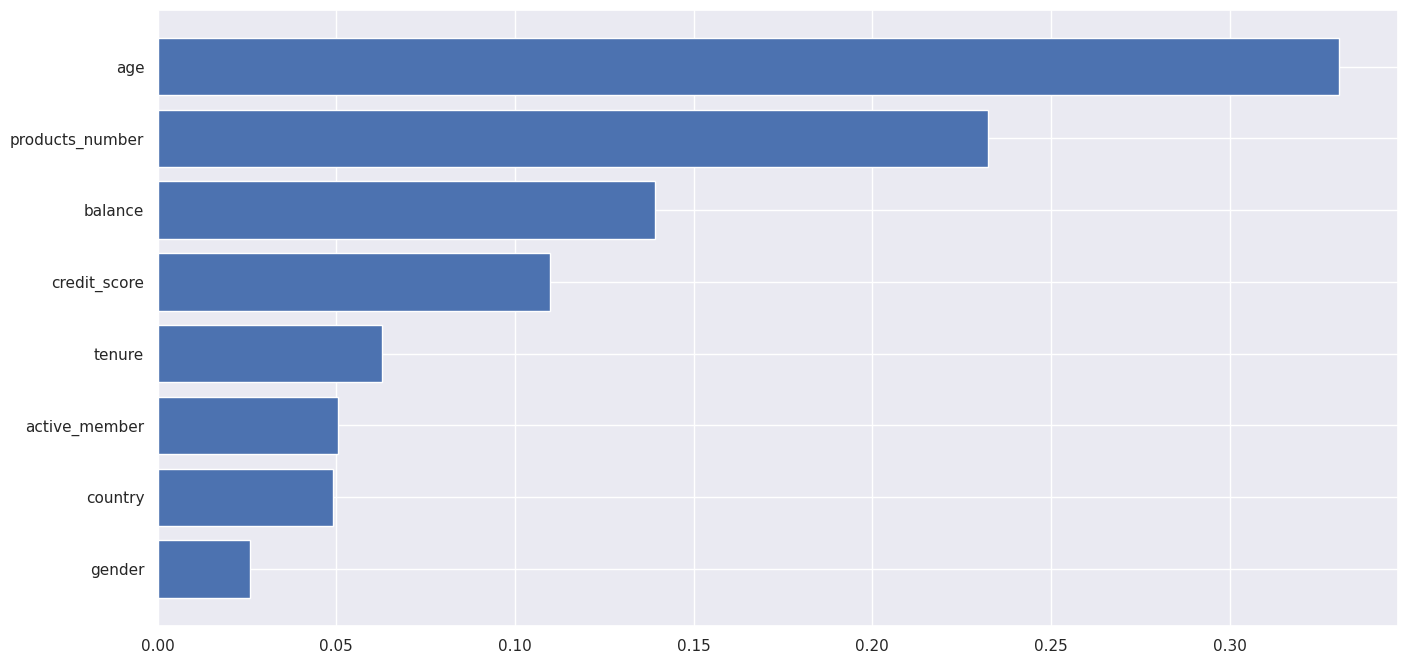

In [454]:
sorted_idx = forest.feature_importances_.argsort()
features = X_train.columns.tolist()
result = sorted(zip(features, forest.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

### Observations
From the above feature importance
- The `age` & `product_number` variable shows high importance than other features in predicting the `churn`
- `gender` shows low importance as justified in linear models too, looks like the exiting of the customer is less impacted due to the `country` as well

In [455]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'active_member', 'churn'],
      dtype='object')

In [456]:
features = df[['credit_score','country', 'gender', 'age', 'tenure', 'balance','products_number', 'active_member']]

### **Fitting a Tree Based Model**


In [457]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

0.26173961565355053


The code creates an instance of the DecisionTreeRegressor class named DTree. The max_depth parameter is set to 3, which limits the maximum depth of the decision tree to 3 levels. This helps prevent overfitting, which is when the model performs well on the training data but poorly on new, unseen data. The random_state parameter is set to 1234, which ensures that the results are reproducible.

Then, the fit() method is called on DTree to train the decision tree model using the training data X_train and y_train. X_train contains the input features (also called independent variables or predictors) for the training data, while y_train contains the corresponding target values (also called dependent variable or response variable).

After training the model, the code uses the score() method to evaluate the performance of the model on the test data. The score() method returns the coefficient of determination R^2 of the prediction, which is a measure of how well the model fits the test data. The higher the R^2 value, the better the model's performance.

In [458]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

In [459]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-"*25)
model_sel(DTree)

DECISION TREE REGRESSION: 
-------------------------
MODEL EVALUATION

r2_score of the model: 
0.26173961565355053


In [460]:
prediction_tree = DTree.predict(X_test)

In [461]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))   
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 0.366806
RMSE: 0.429610
R2 0.261740


The code below uses the plot_tree function from the sklearn.tree module to create a graphical representation of a decision tree model (DTree). The feature_names argument specifies the names of the features used in the model, and the filled argument indicates whether to color the nodes to indicate their impurity.

The resulting plot shows the decision tree with the root node at the top and subsequent nodes branching out below. Each node represents a decision based on a particular feature, with the branch to the left indicating the outcome when the feature meets the decision criterion and the branch to the right indicating the outcome when it does not.

The plot includes the squared_error and samples values for each node, as well as the value for the leaf 
nodes, which represents the predicted target value for that group of samples.

[Text(0.5, 0.875, 'age <= 0.557\nsquared_error = 0.25\nsamples = 12740\nvalue = 0.5'),
 Text(0.25, 0.625, 'products_number <= 0.5\nsquared_error = 0.228\nsamples = 8152\nvalue = 0.353'),
 Text(0.125, 0.375, 'products_number <= 0.167\nsquared_error = 0.218\nsamples = 7714\nvalue = 0.321'),
 Text(0.0625, 0.125, 'squared_error = 0.247\nsamples = 4345\nvalue = 0.443'),
 Text(0.1875, 0.125, 'squared_error = 0.137\nsamples = 3369\nvalue = 0.163'),
 Text(0.375, 0.375, 'balance <= 0.021\nsquared_error = 0.075\nsamples = 438\nvalue = 0.918'),
 Text(0.3125, 0.125, 'squared_error = 0.194\nsamples = 114\nvalue = 0.737'),
 Text(0.4375, 0.125, 'squared_error = 0.018\nsamples = 324\nvalue = 0.981'),
 Text(0.75, 0.625, 'active_member <= 0.5\nsquared_error = 0.182\nsamples = 4588\nvalue = 0.761'),
 Text(0.625, 0.375, 'age <= 0.67\nsquared_error = 0.13\nsamples = 2679\nvalue = 0.847'),
 Text(0.5625, 0.125, 'squared_error = 0.19\nsamples = 1153\nvalue = 0.746'),
 Text(0.6875, 0.125, 'squared_error = 0.07

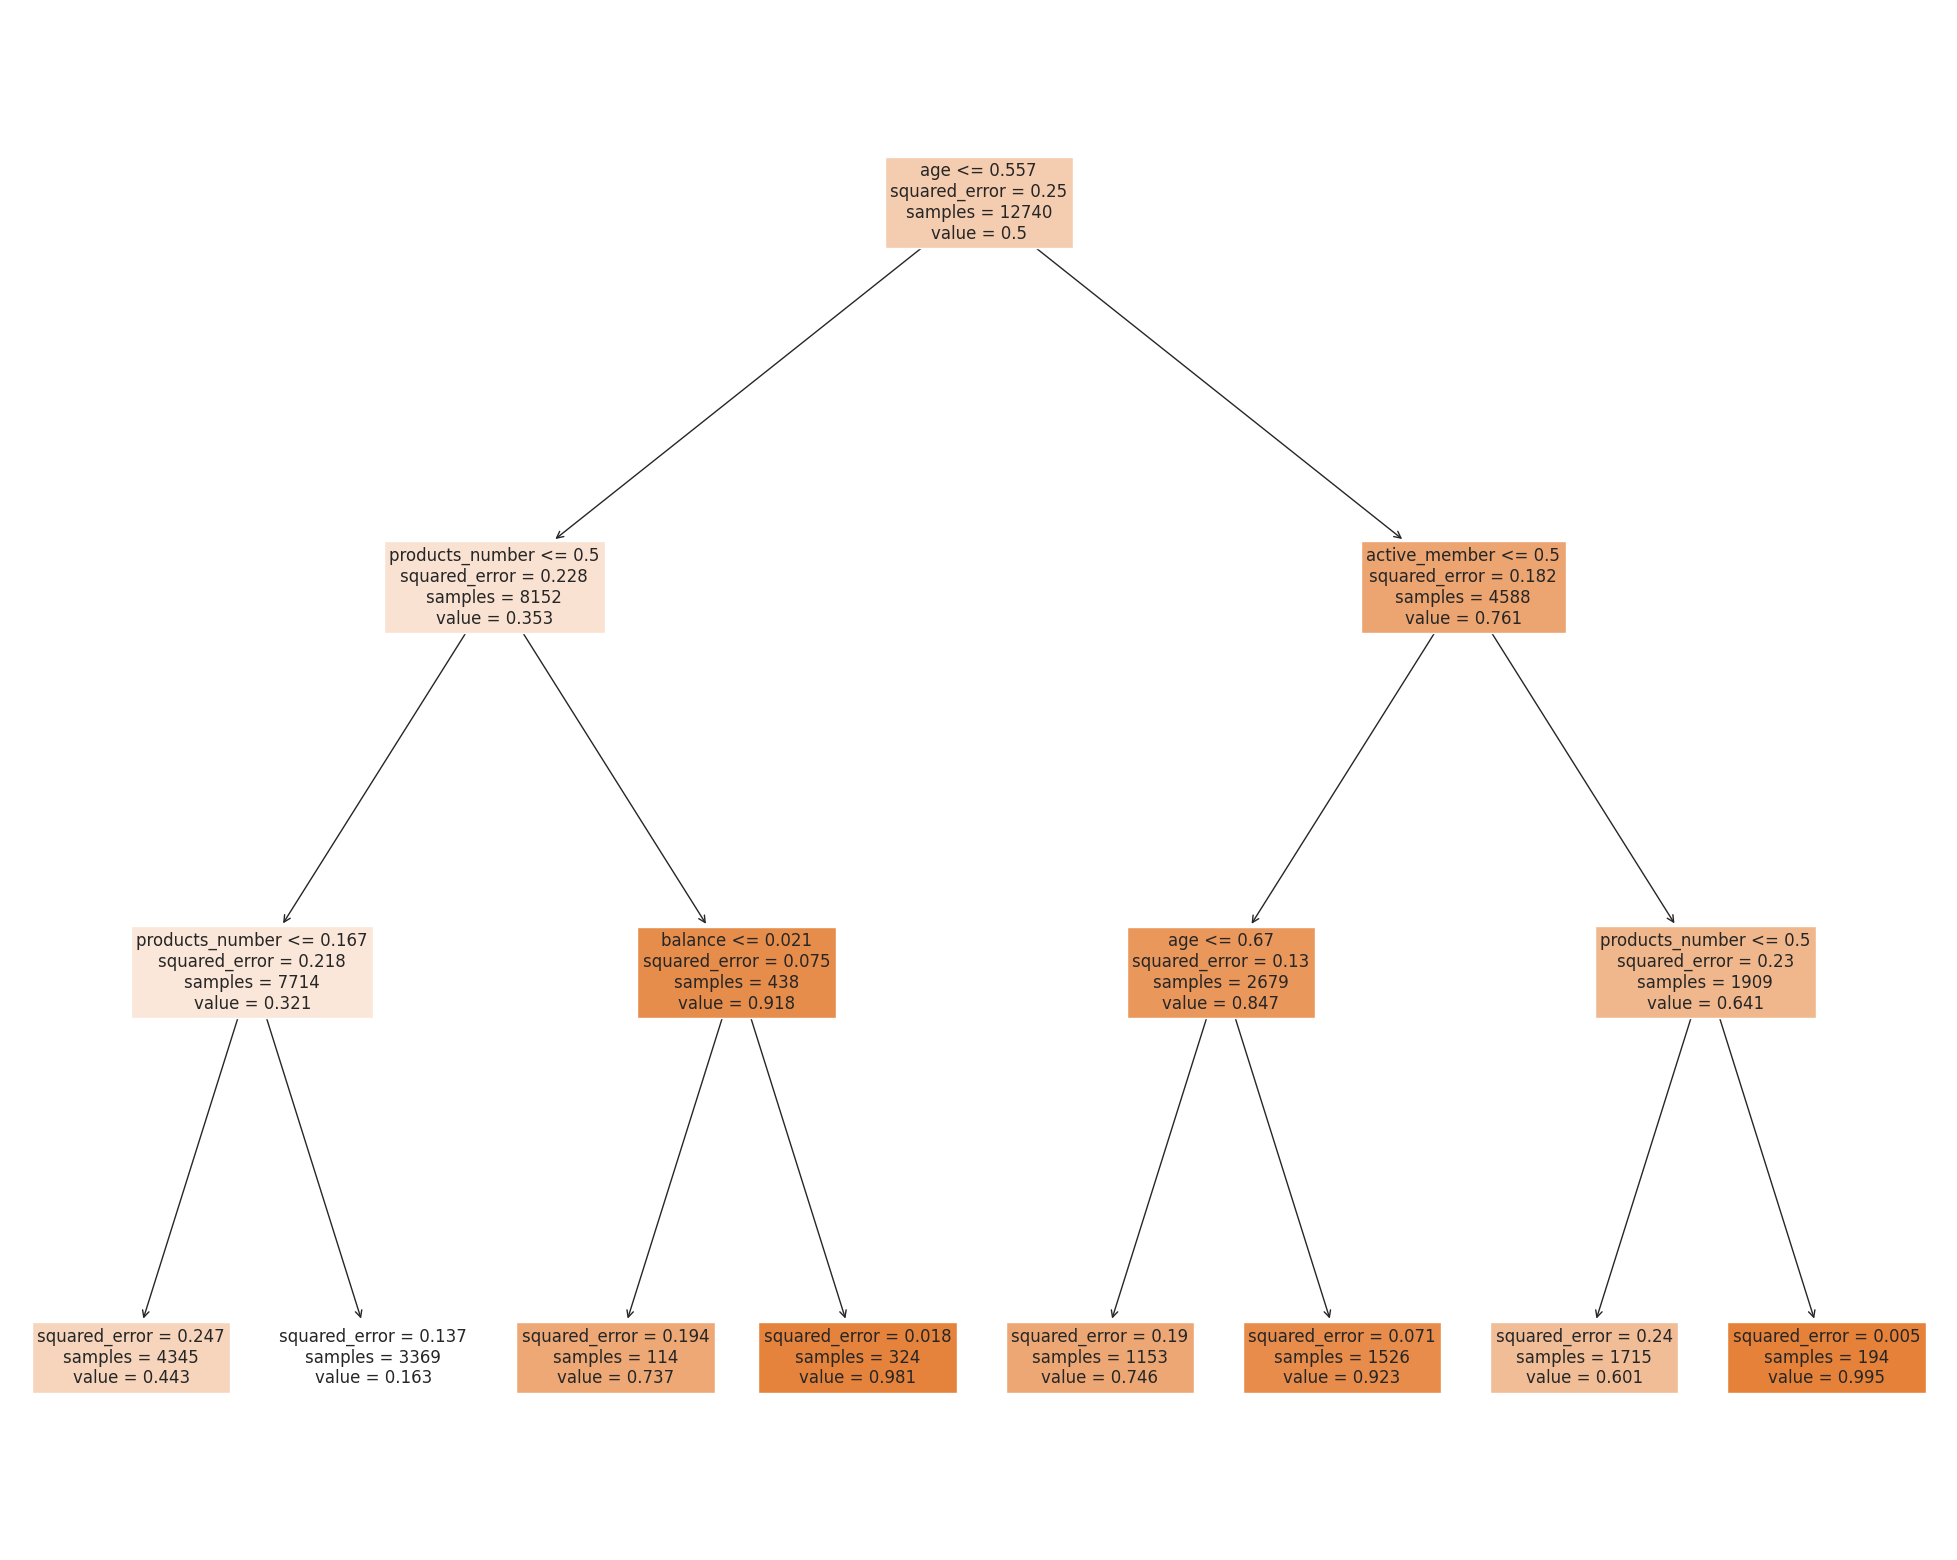

In [462]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

The max_depth of the tree is set at 3. With each note, the data is being split into smaller subset. Node 0 has all samples of the dataset, but it'll be lower by the Node 3. Node 0 - age - took 8000 samples to arrive at value of 0.26. Node 2 and Node 3 - products_number,  active_member - took 6130 and 1870 samples to set a bracket for products_number, balance and age and further the leaves of the tree has a bracket for mse, wherein each mse bracket is given a value.

#### **Q. How to use auto ml to find the best model ?**

#### **Auto ml to find the best model**

In [463]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [464]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         33 mins 32 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_8ixngh
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.043 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [465]:
df_autom = h2o.import_file('https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [466]:
# displaying top 5 rows of dataset
df_autom.head(5)

customer_id    credit_score  country    gender      age    tenure    balance    products_number    credit_card    active_member    estimated_salary    churn
-------------  --------------  ---------  --------  -----  --------  ---------  -----------------  -------------  ---------------  ------------------  -------
  1.56346e+07             619  France     Female       42         2        0                    1              1                1            101349          1
  1.56473e+07             608  Spain      Female       41         1    83807.9                  1              0                1            112543          0
  1.56193e+07             502  France     Female       42         8   159661                    3              1                0            113932          1
  1.57014e+07             699  France     Female       39         1        0                    2              0                0             93826.6        0
  1.57379e+07             850  Spain      Female       43         2   125511                    1              1                1             79084.1        0
[5 rows x 12 columns]

####**Splitting train test and vailidation into 70:15:15 ratio**

In [467]:
train,test,valid = df_autom.split_frame(ratios=[.7, .15])

In [468]:
y = "churn"
x = df_autom.columns
x.remove(y)
x.remove("customer_id")

- Here the target feature is churn for binary classification.
- Removing customer_id as customer id is just unique identifier that is randomly allocated to a customer and dont contribute for the analysis

#### **Initializes an H2O AutoML object.**
The command below initializes an H2O AutoML object with specific settings to limit the number of models built, exclude certain algorithms, and control the verbosity and cross-validation settings.

In [469]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [470]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
20:53:31.883: Project: AutoML_5_20230409_205331
20:53:31.883: Cross-validation disabled by user: no fold column nor nfolds > 1.
20:53:31.884: Setting stopping tolerance adaptively based on the training frame: 0.011954848121045117
20:53:31.884: Build control seed: 10
20:53:31.884: training frame: Frame key: AutoML_5_20230409_205331_training_py_491_sid_8988    cols: 12    rows: 6997  chunks: 8    size: 152026  checksum: -5122654501338001934
20:53:31.884: validation frame: Frame key: py_493_sid_8988    cols: 12    rows: 1484  chunks: 8    size: 50036  checksum: -1516830506984013646
20:53:31.884: leaderboard frame: Frame key: py_493_sid_8988    cols: 12    rows: 1484  chunks: 8    size: 50036  checksum: -1516830506984013646
20:53:31.884: blending frame: NULL
20:53:31.884: response column: churn
20:53:31.884: fold column: null
20:53:31.884: weights column: null
20:53:31.885: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_5_20230409_205331


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          29227                  8            15           11.26         38            45            41.64

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.08766677523054583
RMSE: 0.296085756547906
MAE: 0.19370611586492492
RMSLE: 0.20685511619088012
Mean Residual Deviance: 0.08766677523054583

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.10577026009771748
RMSE: 0.32522340029234903
MAE: 0.21083774967922075
RMSLE: 0.22637875853717868
Mean Residual Deviance: 0.10577026009771748

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-04-09 20:53:34  0.003 sec   0                  0.400492         0.320788        0.160394             0.405609           0.324913          0.164519
    2023-04-09 20:53:34  0.183 sec   5                  0.356625         0.280161        0.127181             0.367245           0.286797          0.134869
    2023-04-09 20:53:34  0.301 sec   10                 0.332774         0.252389        0.110738             0.345617           0.260178          0.119451
    2023-04-09 20:53:34  0.447 sec   15                 0.321355         0.235129        0.103269             0.336101           0.24401           0.112964
    2023-04-09 20:53:34  0.601 sec   20                 0.313922         0.221698        0.0985469            0.330225           0.231593          0.109048
    2023-04-09 20:53:35  0.752 sec   25                 0.309098         0.211651        0.0955418            0.327545           0.22285           0.107286
    2023-04-09 20:53:35  0.903 sec   30                 0.305723         0.2063          0.0934663            0.326355           0.218792          0.106508
    2023-04-09 20:53:35  1.038 sec   35                 0.302798         0.201729        0.0916865            0.325374           0.215161          0.105868
    2023-04-09 20:53:35  1.167 sec   40                 0.30051          0.198629        0.0903061            0.325477           0.213448          0.105935
    2023-04-09 20:53:35  1.324 sec   45                 0.298124         0.195622        0.0888778            0.325255           0.211701          0.105791
    2023-04-09 20:53:35  1.465 sec   50                 0.296086         0.193706        0.0876668            0.325223           0.210838          0.10577

Variable Importances: 
variable          relative_importance    scaled_importance    percentage
----------------  ---------------------  -------------------  ------------
age               846.638                1                    0.348542
products_number   729.13                 0.861206             0.300167
active_member     236.774                0.279664             0.0974747
balance           211.115                0.249356             0.0869113
country           115.786                0.136759             0.0476664
estimated_salary  97.4351                0.115085             0.0401119
credit_score      80.9939                0.0956653            0.0333434
gender            55.9698                0.0661083            0.0230415
tenure            47.1862                0.0557335            0.0194255
credit_card       8.05482                0.00951389           0.00331599

[tips]
Use `model.

####**Points Learnt:**
- Passing the input features `x` , output column `y` which is churn and training dataframe `train` and valiation dataframe `valid` as input to the train function. 
- Whenever it creates new model it updates the new leader like for `XGBoost` , `GLM`, `GBM` Gradient Boosting Model, Distributed Random Forest `DRF` and all the other models

#### **Training the AutoML with training data** 
below, gives the leaderboard which has performance of models after training


In [471]:
lb = aml.leaderboard

In [472]:
best_model = aml.get_best_model()

In [473]:
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_5_20230409_205331


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          29227                  8            15           11.26         38            45            41.64

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.08766677523054583
RMSE: 0.296085756547906
MAE: 0.19370611586492492
RMSLE: 0.20685511619088012
Mean Residual Deviance: 0.08766677523054583

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.10577026009771748
RMSE: 0.32522340029234903
MAE: 0.21083774967922075
RMSLE: 0.22637875853717868
Mean Residual Deviance: 0.105770260097

#### **Observations on best model:**
- **Gradient Boosting Machine** is the best performing model with model key *GBM_3_AutoML_12_20230227_23505*
- `age` has the highest relative_importance with respect to the target feature `churn` and followed by `product_number`
 

In [474]:
lb.head()

model_id                                rmse       mse       mae     rmsle    mean_residual_deviance
----------------------------------  --------  --------  --------  --------  ------------------------
GBM_1_AutoML_5_20230409_205331      0.325223  0.10577   0.210838  0.226379                  0.10577
GBM_2_AutoML_5_20230409_205331      0.325266  0.105798  0.208548  0.225638                  0.105798
GBM_3_AutoML_5_20230409_205331      0.327444  0.107219  0.209596  0.228057                  0.107219
XGBoost_3_AutoML_5_20230409_205331  0.328719  0.108056  0.213775  0.229791                  0.108056
DRF_1_AutoML_5_20230409_205331      0.331712  0.110033  0.212525  0.232309                  0.110033
GBM_4_AutoML_5_20230409_205331      0.33437   0.111804  0.215036  0.23372                   0.111804
XRT_1_AutoML_5_20230409_205331      0.343125  0.117735  0.249547  0.243564                  0.117735
XGBoost_2_AutoML_5_20230409_205331  0.350828  0.12308   0.235127  0.251646                  0.12308
XGBoost_1_AutoML_5_20230409_205331  0.35927   0.129075  0.24356   0.258586                  0.129075
GLM_1_AutoML_5_20230409_205331      0.377979  0.142868  0.288125  0.265791                  0.142868
[10 rows x 6 columns]

##### **Gradient Boosting Machine is the best model.**

#### **Q. How to run SHAP analysis on the models ?**

#### **Shap Analysis**

The technique called SHAP (SHapley Additive exPlanations), created by Lundberg and Lee in 2017, is used to clarify specific predictions. It relies on the most efficient Shapley values from game theory to do this. SHAP's objective is to determine how each feature adds to the prediction of an instance x. By using coalitional game theory, the SHAP explanation method calculates Shapley values.

In [475]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [476]:
import shap

#### **Shap Analysis of the Linear Model**

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


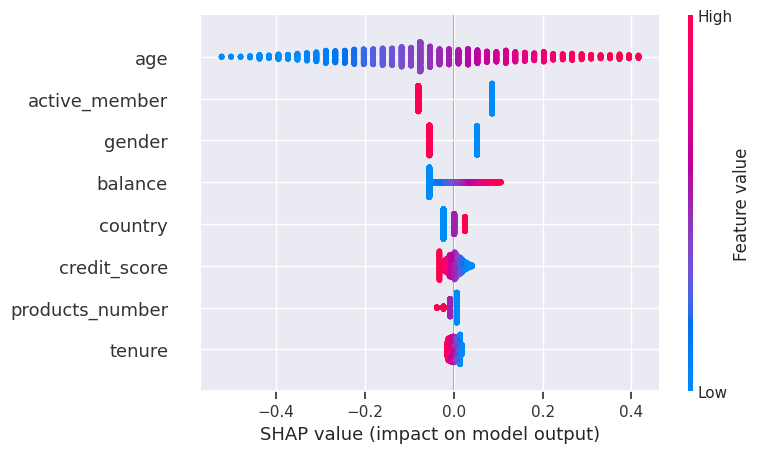

In [477]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

explainer_sh = shap.LinearExplainer(lin_reg, X_train, feature_perturbation='interventional',feature_names=features.columns)
shap_values_lg = explainer_sh.shap_values(X_test)
shap.summary_plot(shap_values_lg, X_test, feature_names=features.columns)

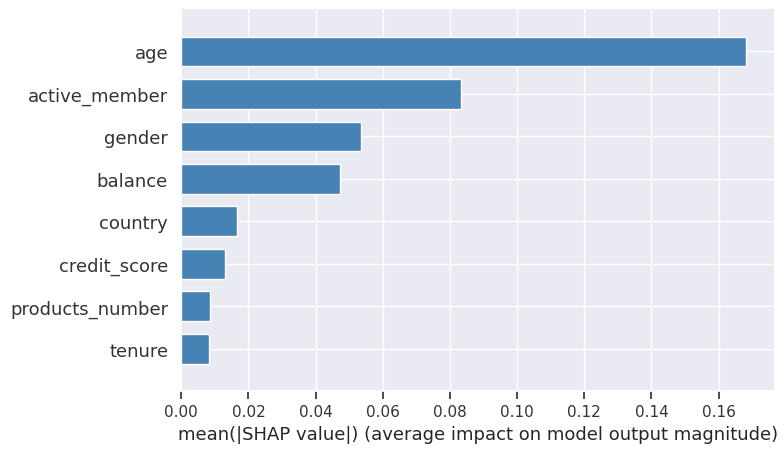

In [478]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='steelblue')

#### **Observations**

- The `age` and `active_member` variable shows high importance than other features in predicting the `churn` feature


#### **Tree Model - Shap Analysis**

In [479]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(X_test)

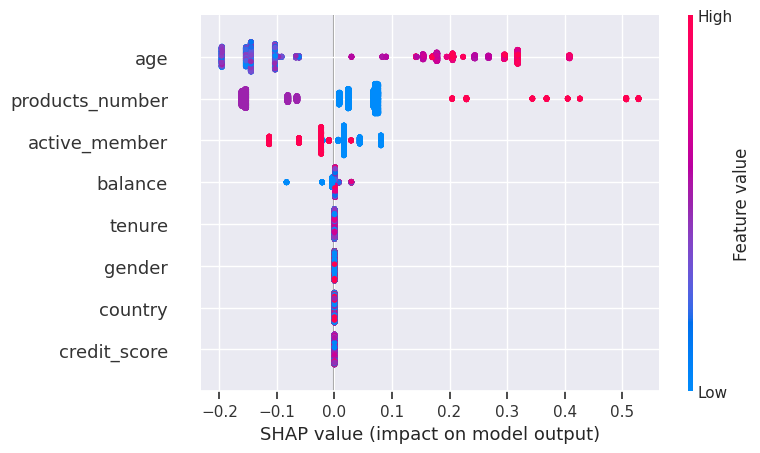

In [480]:
shap.summary_plot(shap_values_tree, X_test)

The tree model suggests that `age` and `product_number` is more signifiacnt where in linear regression, `age` and `active_member` were the most significant features.

#### **AutoML - Shap Analysis**
AutoML has it's on shap analysis method built into the package since the SHAP package has no native support for the models on AutoML.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
----------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  -------
GBM_1_AutoML_5_20230409_205331      0.328626  0.107995  0.212584  0.228553                  0.107995                1473                   0.044023  GBM
DRF_1_AutoML_5_20230409_205331      0.328843  0.108138  0.210368  0.230523                  0.108138                4037                   0.062739  DRF
GBM_2_AutoML_5_20230409_205331      0.331641  0.109986  0.213985  0.230296                  0.109986                1254                   0.03398   GBM
GBM_3_AutoML_5_20230409_205331      0.331715  0.110035  0.213159  0.231154                  0.110035                1270                   0.050345  GBM
GBM_4_AutoML_5_20230409_205331      0.332372  0.110471  0.214479  0.231955                  0.110471                1362                   0.044942  GBM
XGBoost_3_AutoML_5_20230409_205331  0.332784  0.110745  0.215533  0.232092                  0.110745                2749                   0.006991  XGBoost
XRT_1_AutoML_5_20230409_205331      0.335415  0.112503  0.241933  0.236788                  0.112503                4293                   0.070475  DRF
XGBoost_2_AutoML_5_20230409_205331  0.354235  0.125482  0.240056  0.252589                  0.125482                2544                   0.008333  XGBoost
XGBoost_1_AutoML_5_20230409_205331  0.363604  0.132208  0.246408  0.261527                  0.132208                2117                   0.015084  XGBoost
GLM_1_AutoML_5_20230409_205331      0.376024  0.141394  0.280927  0.262454                  0.141394                 241                   0.006269  GLM
[10 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

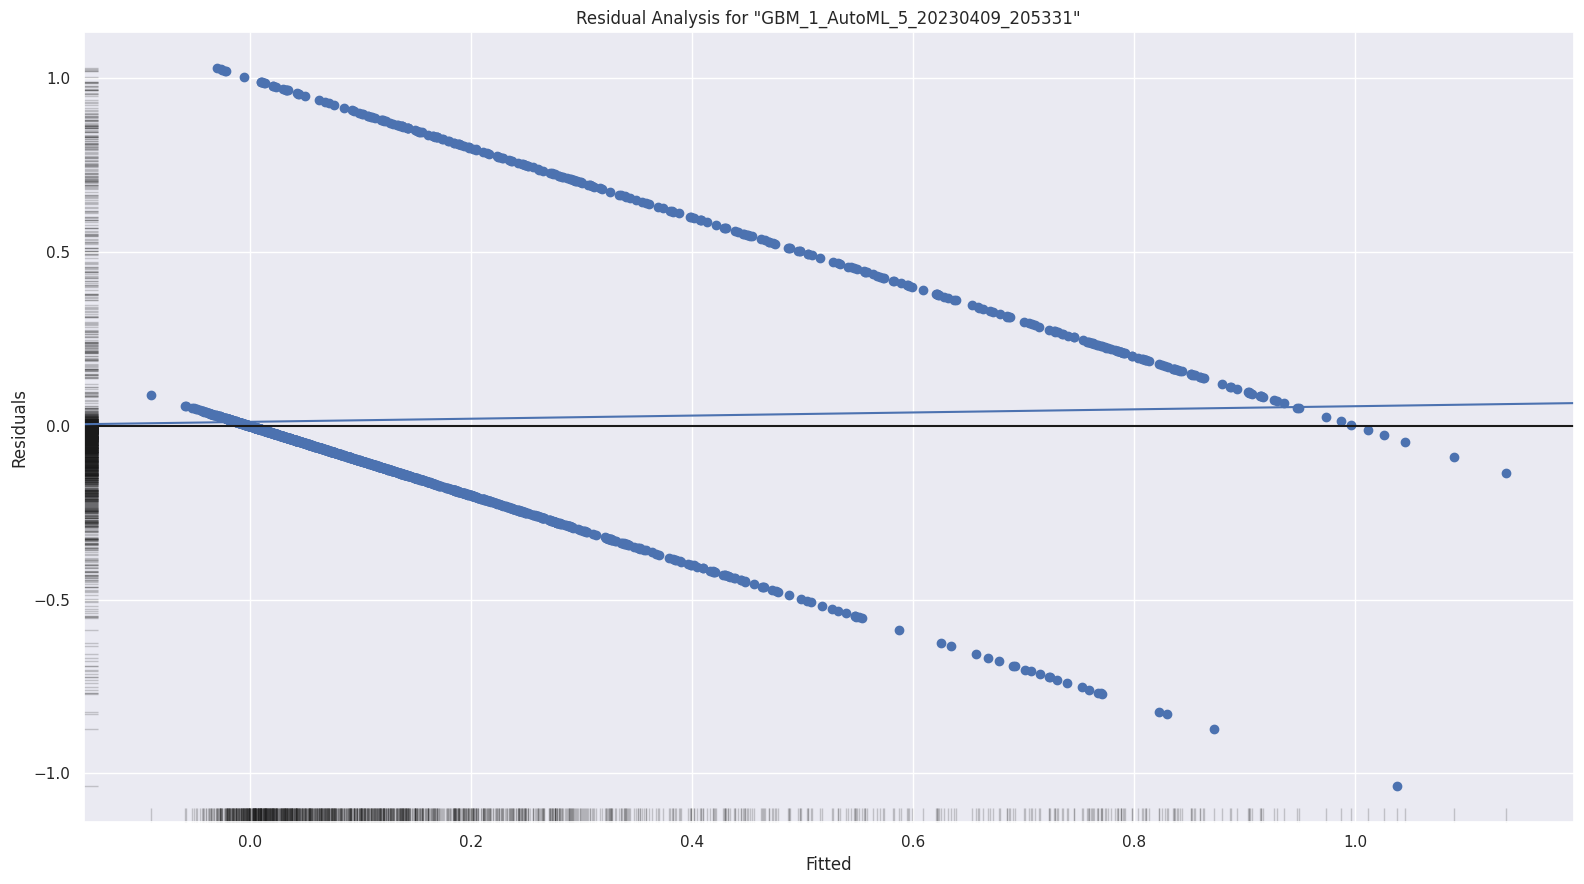

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

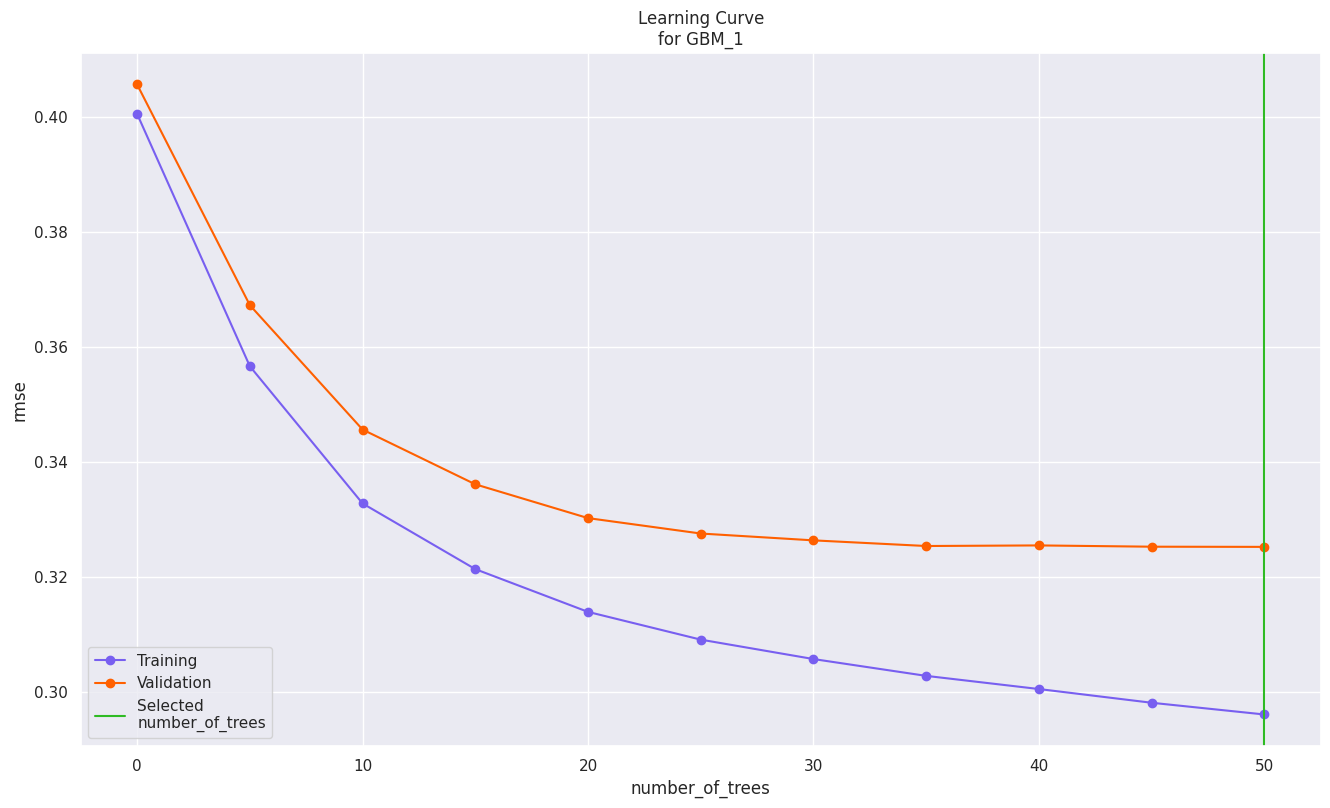

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

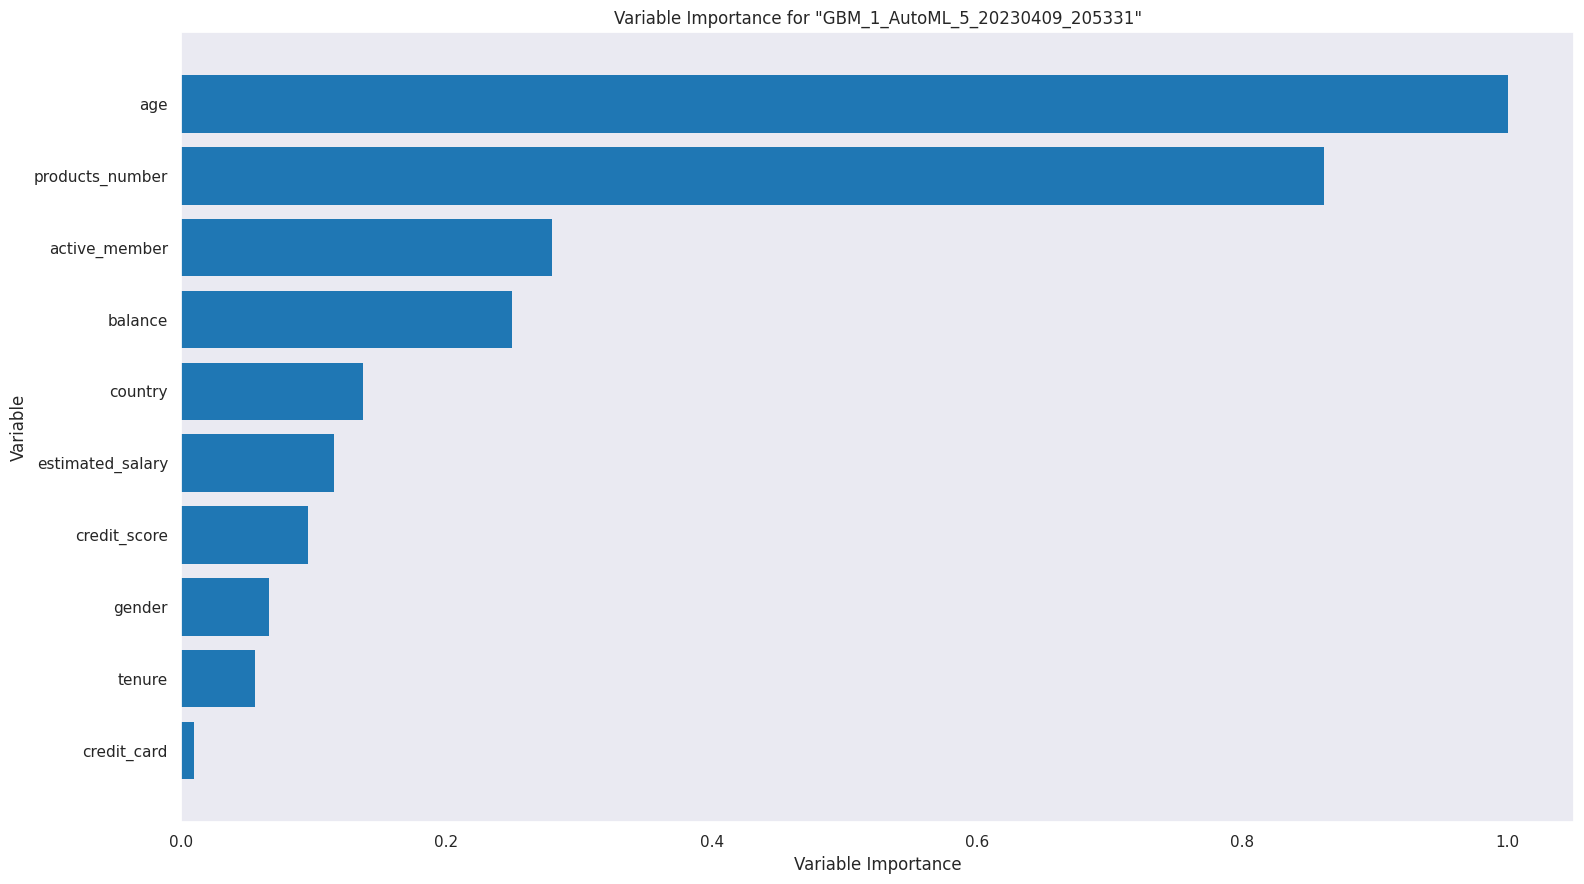

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

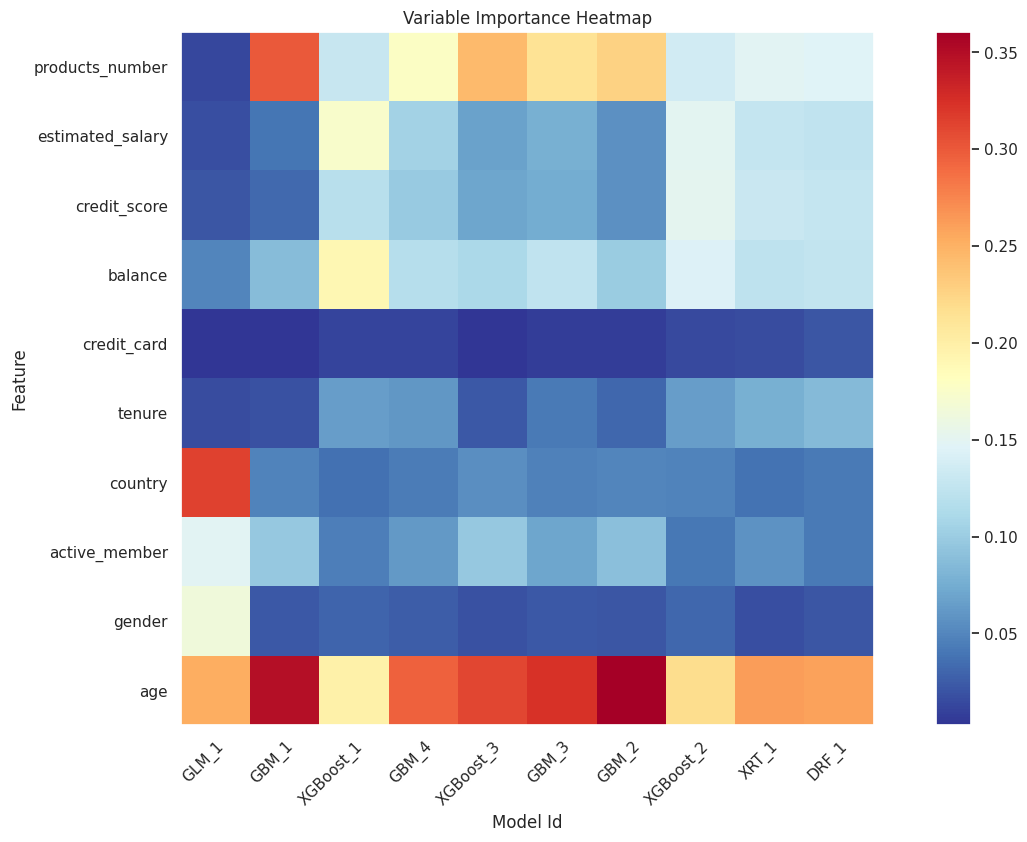

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

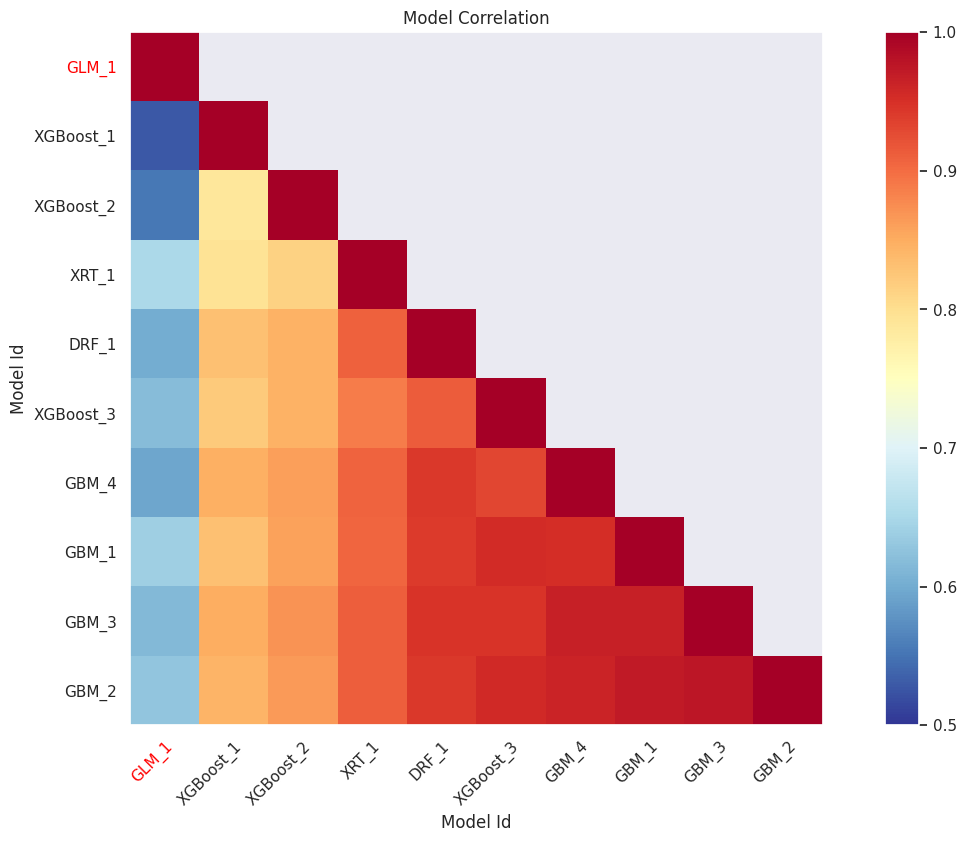

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

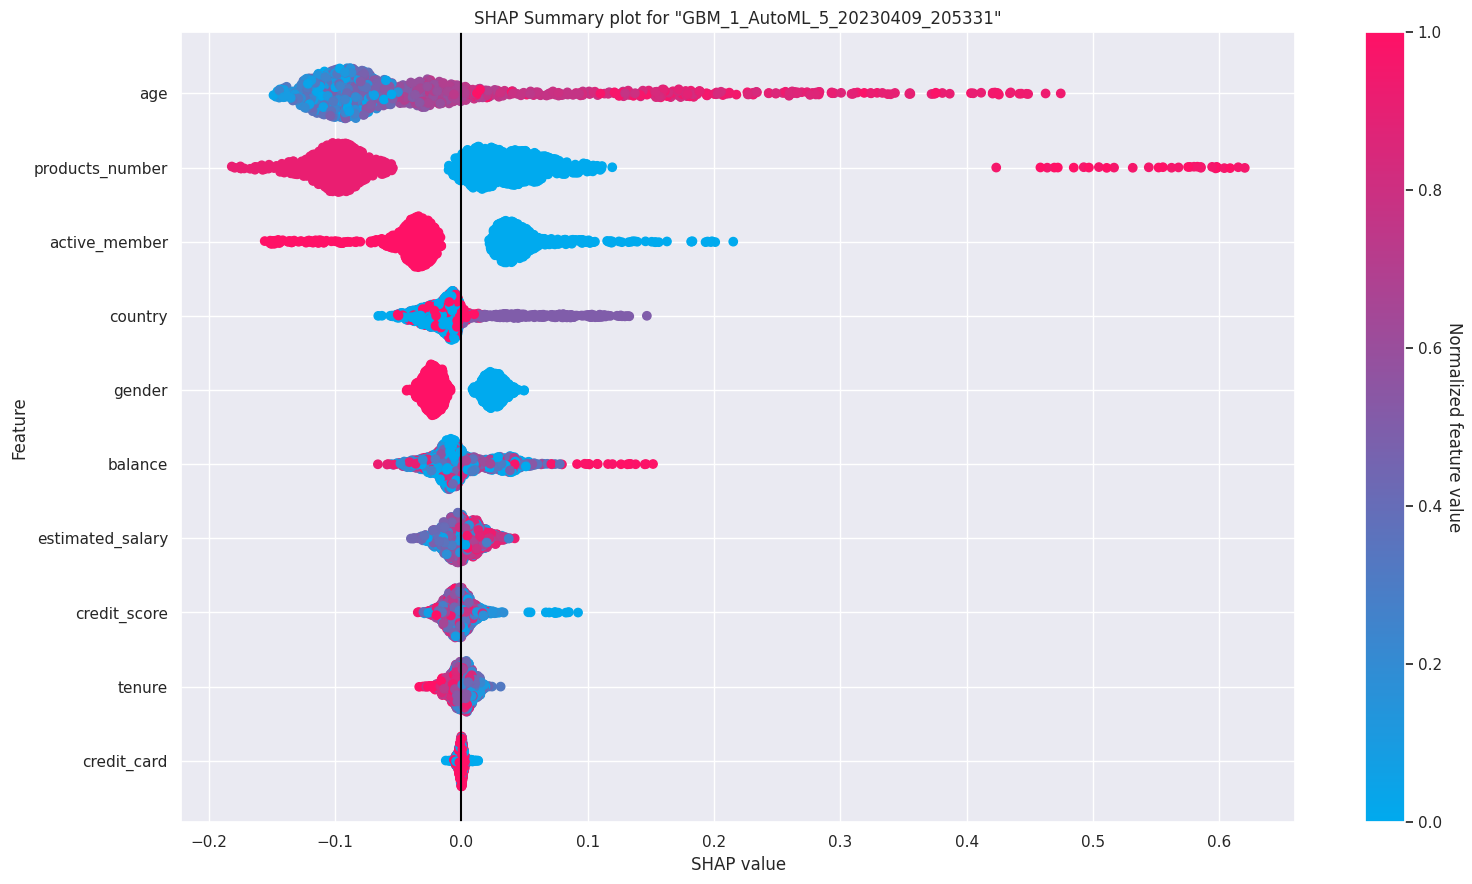

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

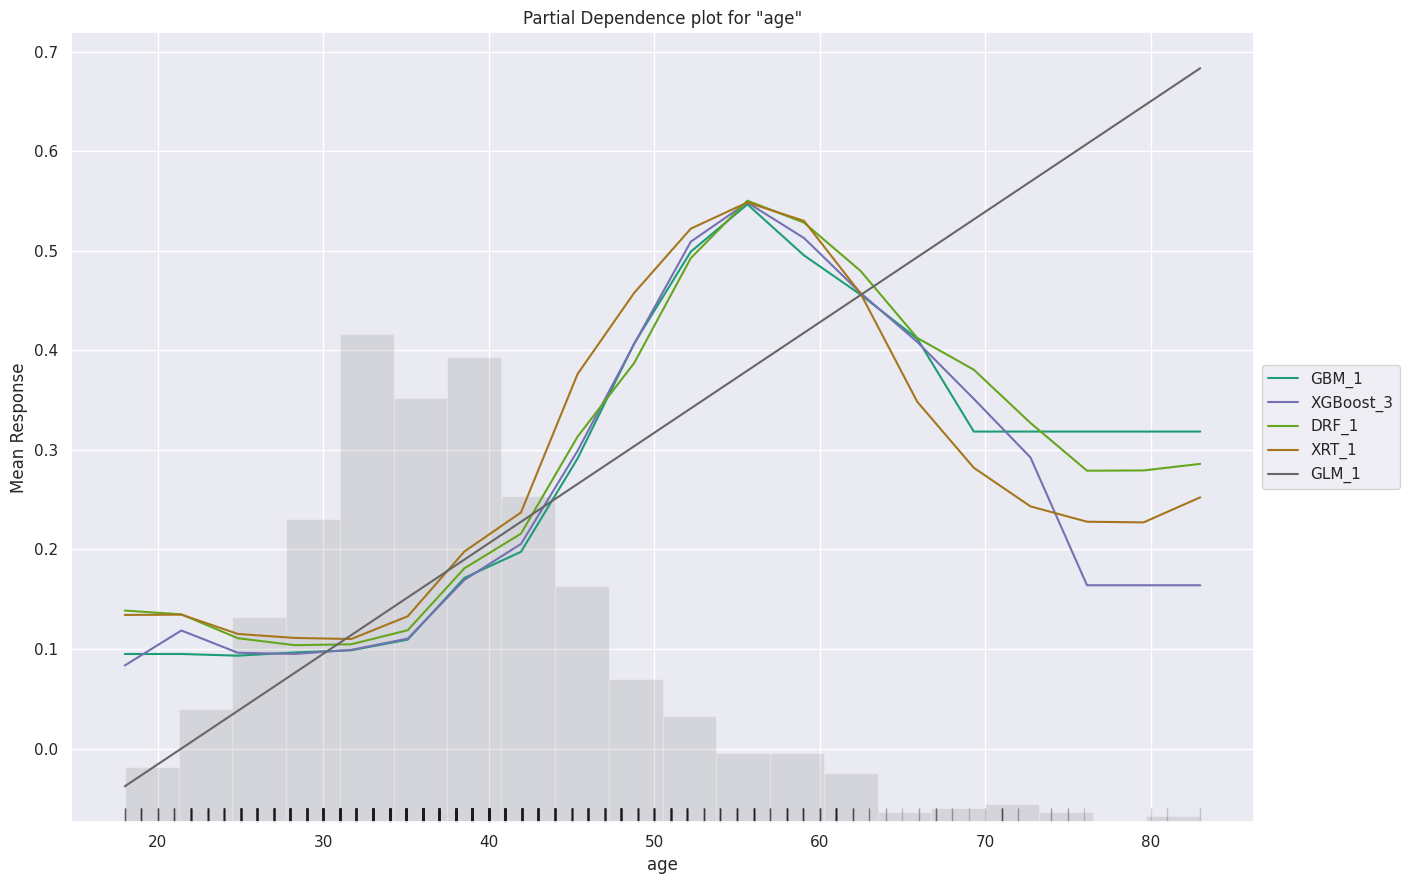

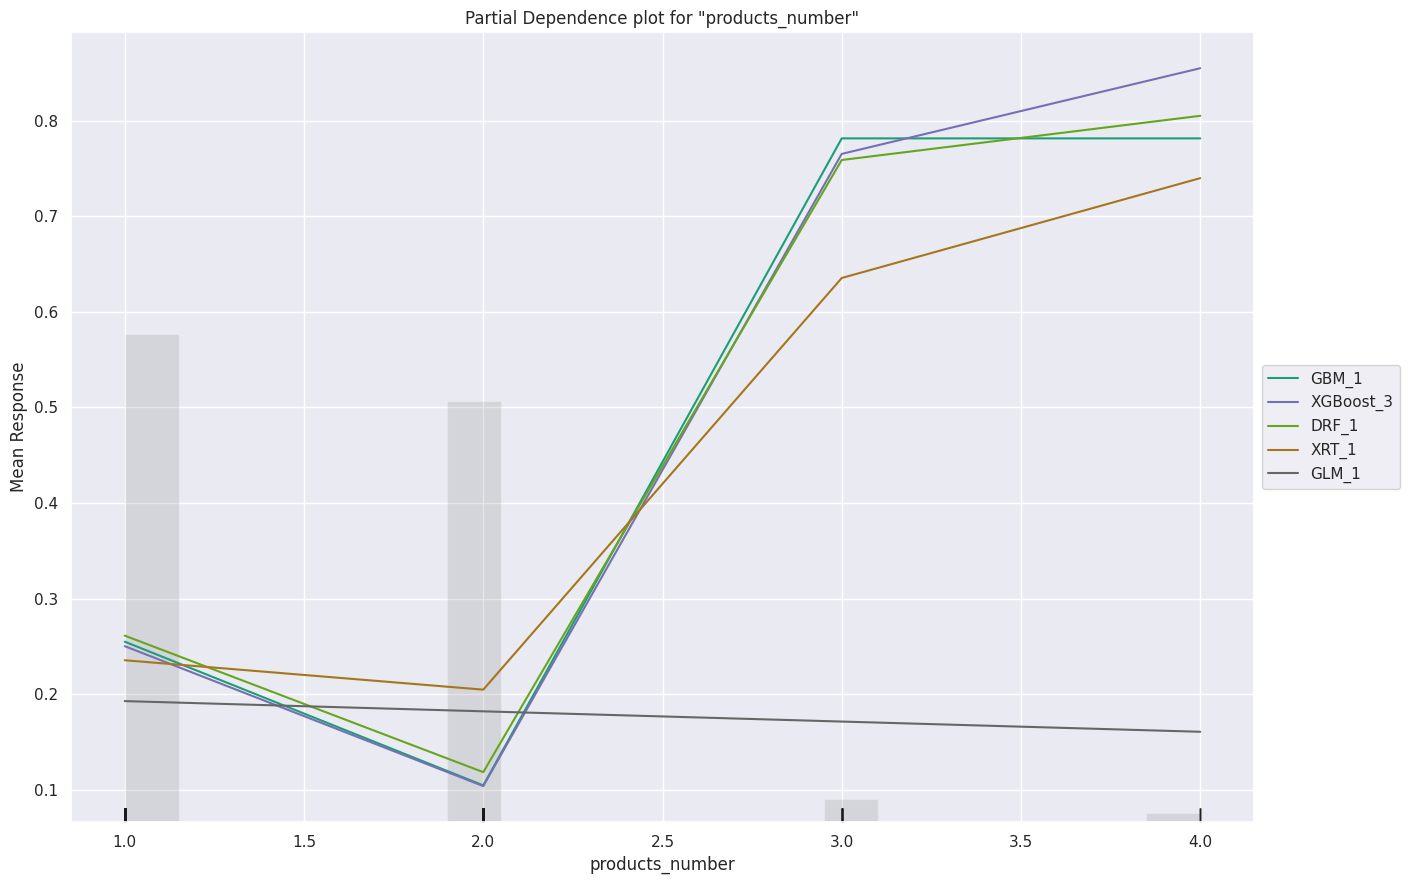

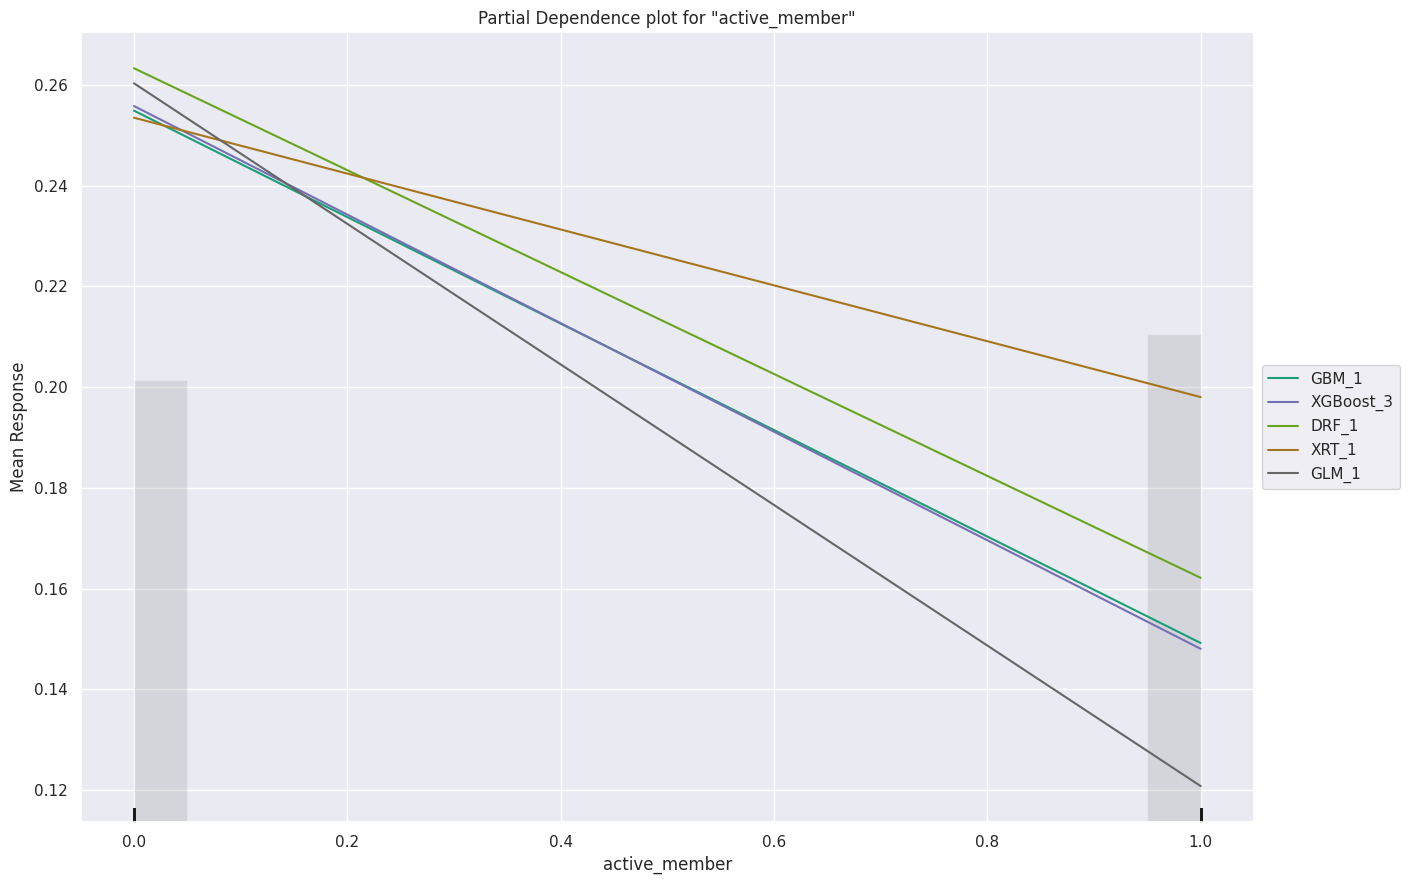

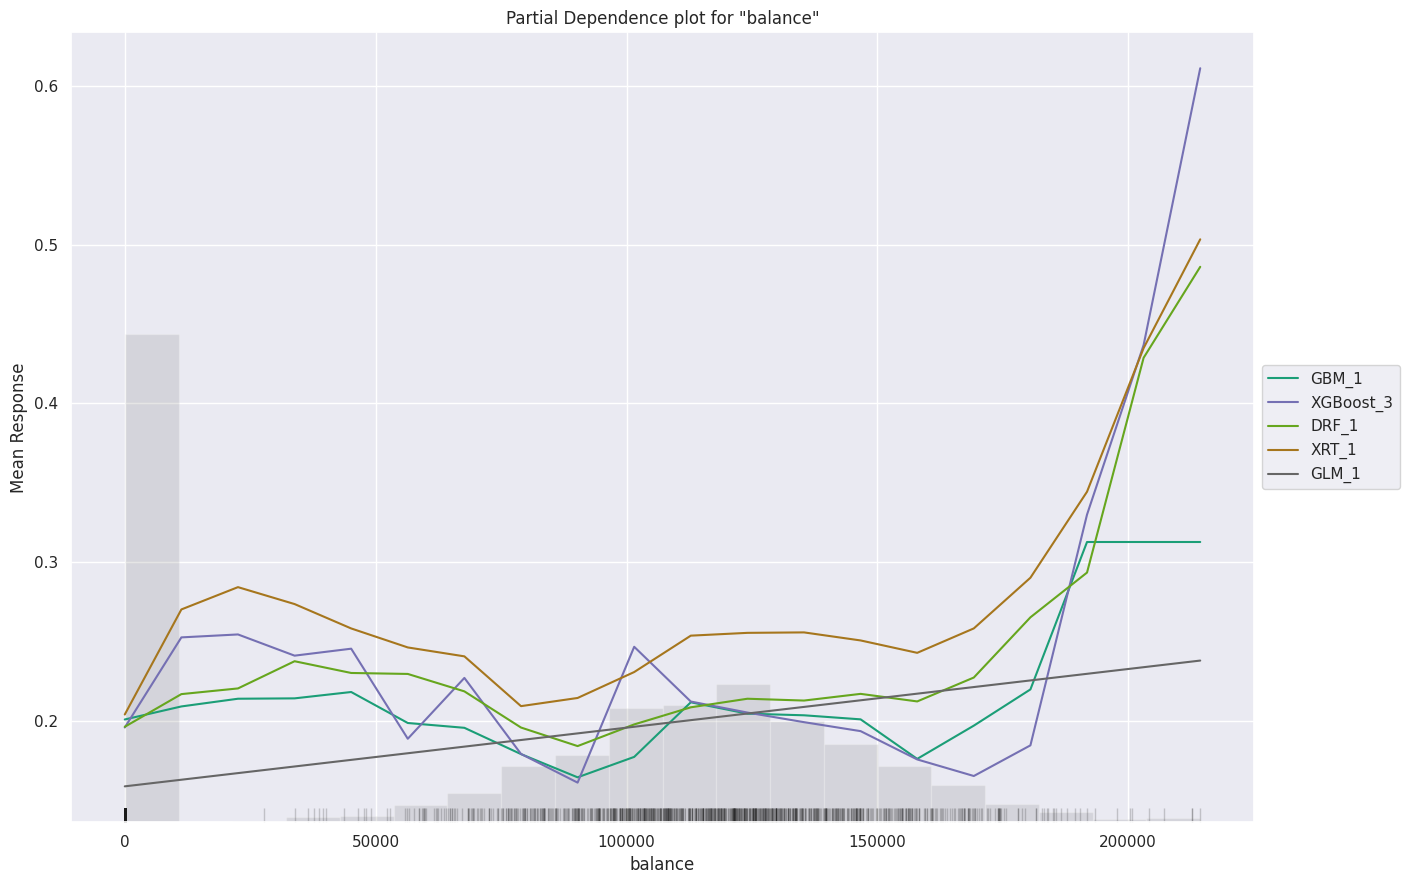

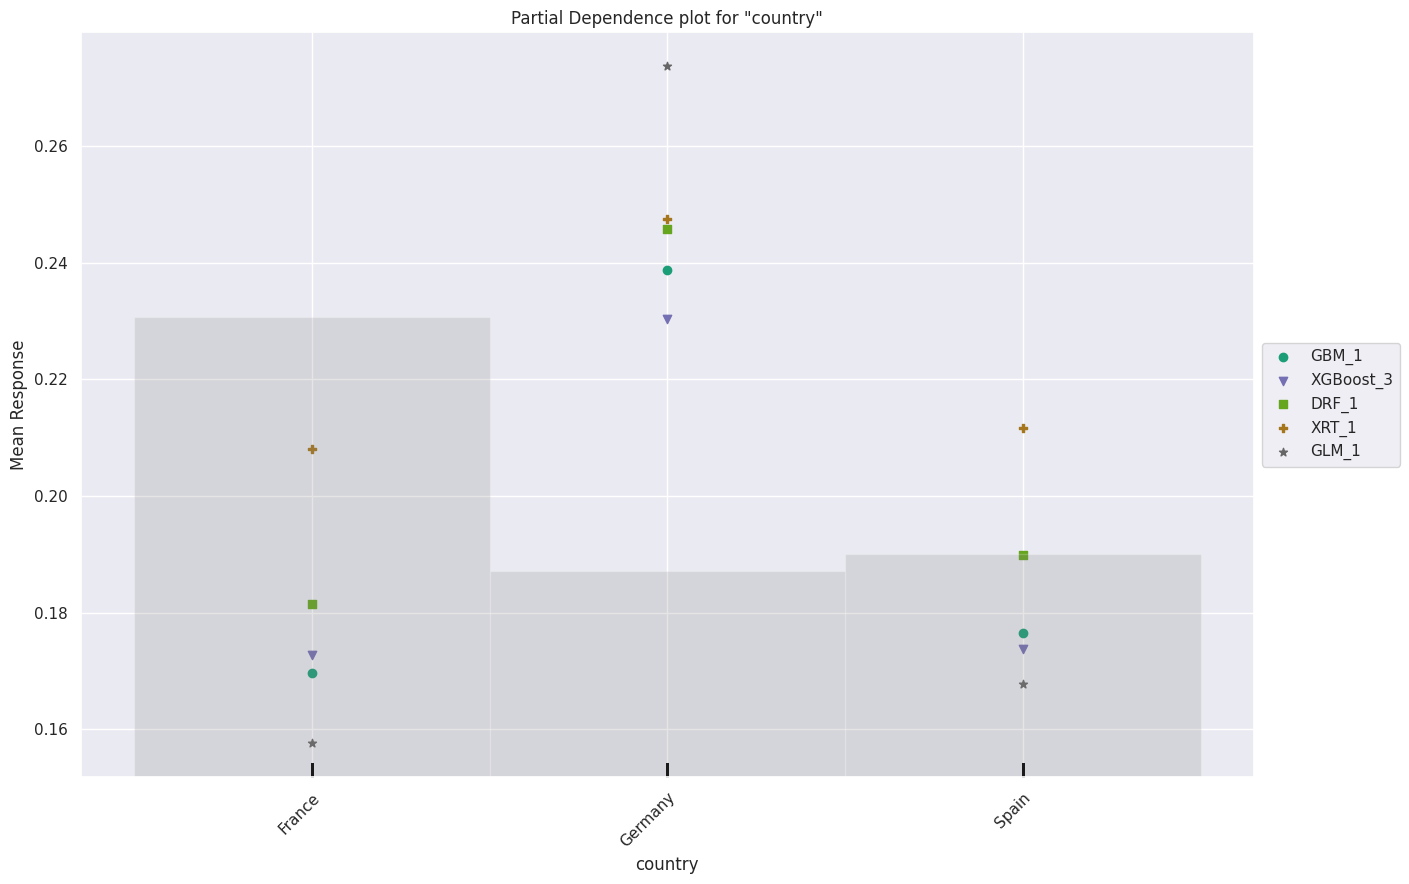

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

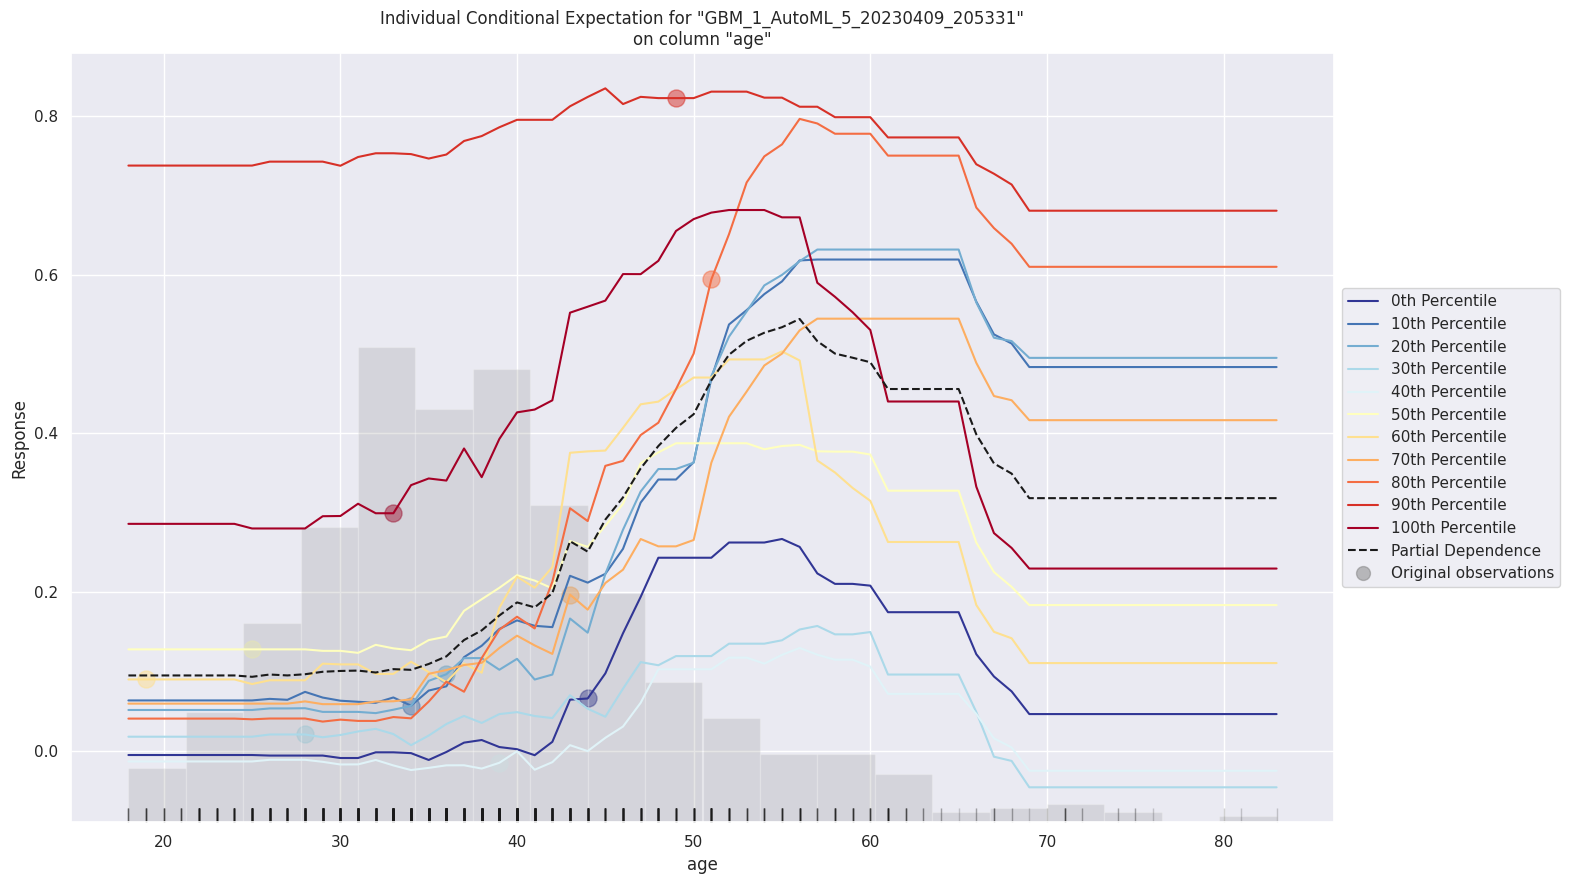

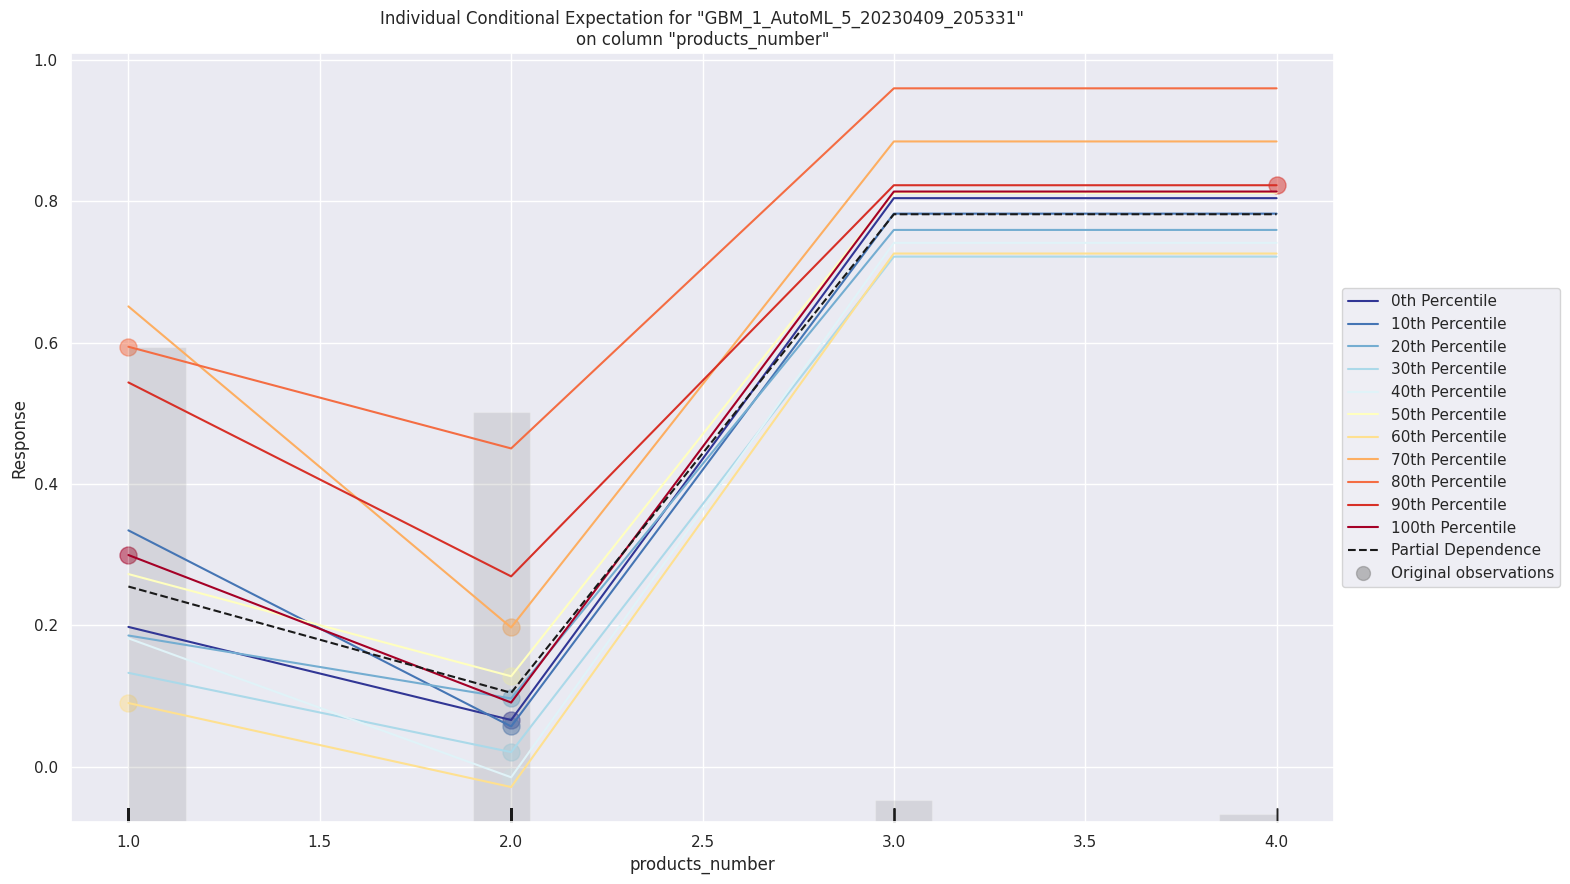

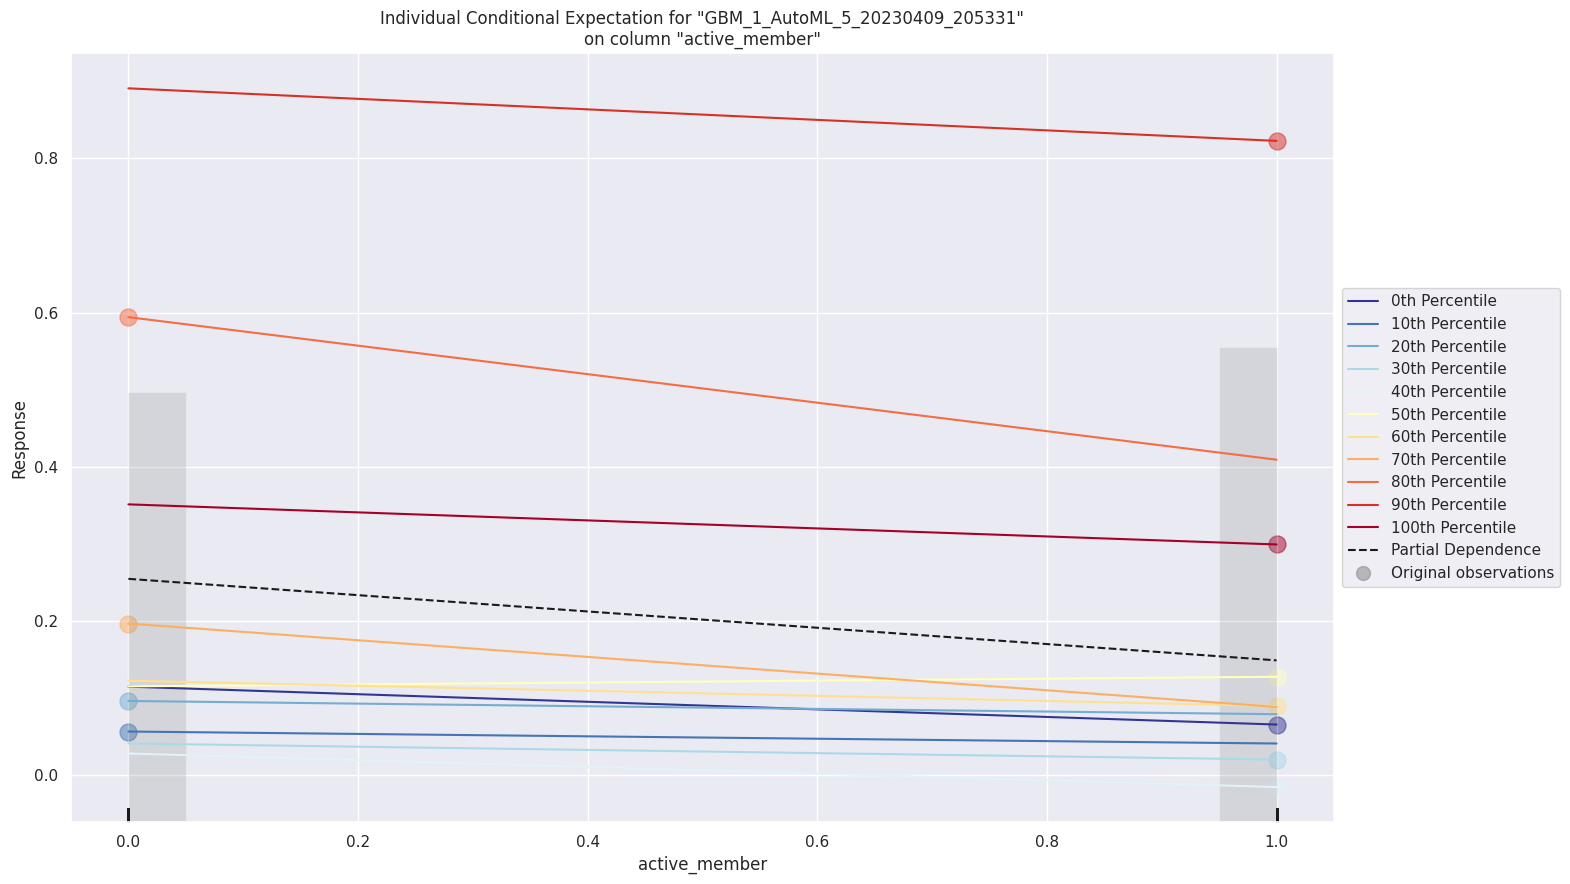

In [ ]:
exm = aml.explain(test)

###**Observations**:

##### **From Variable importance graph**

- `age` shows high importance in predicting the target varible `churn`. Its very high showing colinearity
- `credit_card` of a machine has no much importance in predicting target i.e `churn`

##### **From Shap Analysis**

- Expect `age` and `product_number` other features doesn't show high variation in the impact on target variable



### **Conclusion**

From above analysis :

* The data has both numerical and categorical
* `age` has extreme outliers and handled later for improved results and also `credit_score` has minimal outliers.
* over sampling helped in getting more data as the target distribution is unbalanced.
* The data has no null values 
* Feature scaling is done using min max scaler to get all the feature range between 0 and 1 
* Multi colinearity is observed in some features and removed it after checking permutation importance
* Important features are selected and considered for modeling
* Slight difference in model performance is observed with outlier unhandled vs outliers handled.
* In Linear model, SHAP abalysis shows similar inference like the feature importance approaches like OLS regression
* In a treebased model the inferences from feature importance and SHAP are almost same how ever they are a bit different on same traget variable comparing to linear modeling
* SHAP helps us in understanding the importance of a feature in a row level and fairly showing the population density at that instant
* for `churn` variable different models showed different impact on the same target 
* In a tree based model `age` and `product_number` showed high importance on `churn` while other models showed `active_member` as an important feature over every other




### References:

1. Permutation importance is refered from scikit-learn permutation handling concept document https://scikit-learn.org/stable/modules/permutation_importance.html
2. Outlier Imputation is refered from sklearn "logistic-regression-using-python-and-excel" explanation
3. GeeksForGeeks Quantile-Quantile plot documentation https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/
4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
5. Matplotlib documentation
6. Outlier handling is referec from analytics vidhya outlier handling theoritical explanation https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
7. Modeling is refered from scikit-learn logistic regression officiakl documentatio
8. Refered Kaggle contributions for oversampling  
9. permutation importance is refered from scikit-learn permutation handling concept document https://scikit-learn.org/stable/modules/permutation_importance.html
10. modeling is refered from scikit-learn logistic regression officiakl documentatio
11. Outlier Imputation is refered from sklearn "logistic-regression-using-python-and-excel" explanation
12. Refered Kaggle contributions for oversampling 
13. Outlier handling is referec from analytics vidhya outlier handling theoritical explanation https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
14. Shap Analysis is refered from https://www.analyticsvidhya.com/blog/2021/11/model-explainability/

All other code and function implementation are independently written.


Copyright 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.